## Učitavanje modula

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
from matplotlib.ticker import MaxNLocator
import numpy as np
from datetime import datetime
import os
import random

## Učitavanje podataka

In [3]:
DATA_CLEANED_PATH = '../data/interim/data_no_cancellations.parquet'
DATA_HOTEL0_BASE_PATH = '../data/interim/hotel_0'
DATA_HOTEL1_BASE_PATH = '../data/interim/hotel_1'
DATA_HOTEL0_PATH = '../data/interim/hotel_0/hotel0cleaned.parquet'
DATA_HOTEL1_PATH = '../data/interim/hotel_1/hotel1cleaned.parquet'


In [4]:
NumberOfGuestsDailyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "daily", "daily_guests.parquet"))
NumberOfArrivalsDailyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "daily", "daily_arrivals.parquet"))
NumberOfNewGuestsDailyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "daily", "daily_new_guests.parquet"))

NumberOfGuestsWeeklyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "weekly", "weekly_guests.parquet"))
NumberOfArrivalsWeeklyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "weekly", "weekly_arrivals.parquet"))
NumberOfNewGuestsWeeklyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "weekly", "weekly_new_guests.parquet"))

NumberOfGuestsMonthlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "monthly", "monthly_guests.parquet"))
NumberOfArrivalsMonthlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "monthly", "monthly_arrivals.parquet"))
NumberOfNewGuestsMonthlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "monthly", "monthly_new_guests.parquet"))

NumberOfGuestsYearlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "yearly", "yearly_guests.parquet"))
NumberOfArrivalsYearlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "yearly", "yearly_arrivals.parquet"))
NumberOfNewGuestsYearlyResort = pd.read_parquet(os.path.join(DATA_HOTEL0_BASE_PATH, "yearly", "yearly_new_guests.parquet"))

In [5]:
NumberOfGuestsDailyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "daily", "daily_guests.parquet"))
NumberOfArrivalsDailyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "daily", "daily_arrivals.parquet"))
NumberOfNewGuestsDailyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "daily", "daily_new_guests.parquet"))

NumberOfGuestsWeeklyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "weekly", "weekly_guests.parquet"))
NumberOfArrivalsWeeklyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "weekly", "weekly_arrivals.parquet"))
NumberOfNewGuestsWeeklyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "weekly", "weekly_new_guests.parquet"))

NumberOfGuestsMonthlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "monthly", "monthly_guests.parquet"))
NumberOfArrivalsMonthlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "monthly", "monthly_arrivals.parquet"))
NumberOfNewGuestsMonthlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "monthly", "monthly_new_guests.parquet"))

NumberOfGuestsYearlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "yearly", "yearly_guests.parquet"))
NumberOfArrivalsYearlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "yearly", "yearly_arrivals.parquet"))
NumberOfNewGuestsYearlyCity = pd.read_parquet(os.path.join(DATA_HOTEL1_BASE_PATH, "yearly", "yearly_new_guests.parquet"))

In [6]:
NumberOfNewGuestsDailyCityCopy = NumberOfNewGuestsDailyCity.copy()
NumberOfNewGuestsWeeklyCityCopy = NumberOfNewGuestsWeeklyCity.copy()
NumberOfNewGuestsMonthlyCityCopy = NumberOfNewGuestsMonthlyCity.copy()

In [7]:
NumberOfGuestsDailyCityCopy = NumberOfGuestsDailyCity.copy()
NumberOfGuestsWeeklyCityCopy = NumberOfGuestsWeeklyCity.copy()
NumberOfGuestsMonthlyCityCopy = NumberOfGuestsMonthlyCity.copy()

In [8]:
data = pd.read_parquet(DATA_CLEANED_PATH)
dataResort = pd.read_parquet(DATA_HOTEL0_PATH)
dataCity = pd.read_parquet(DATA_HOTEL1_PATH)

U bilježnici anomaly_detection.ipynb,u zaključku su opisani modeli koji uspješno detektiraju naomalije.
Ti modeli će u ovoj bilježnici biti korišteni za smanjenje anomalija u podacima.

## Zaglađivanje anomalija broja novih gostiju kod City Hotela (hotel ID 1)

**Problemi s anomalija kod City Hotela za dolaske novih gostiju (npr. 0 novih gostiju u nekim danima)**

In [9]:
indexes = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]
for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days > 1:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju jednak nuli : od 2015-02-01 do 2015-04-30, ukupno 89 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-06-01 do 2015-06-30, ukupno 30 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-05 do 2015-07-06, ukupno 2 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-12 do 2015-07-14, ukupno 3 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-16 do 2015-07-16, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-19 do 2015-07-19, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-21 do 2015-07-21, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2017-09-01 do 2017-09-30, ukupno 30 dana


In [10]:
indexes_valid = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]
for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]).days > 1:
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    print(f"Periodi gdje je broj gostiju različit nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju različit nuli : od 2015-01-01 do 2015-01-31, ukupno 31 dana
Periodi gdje je broj gostiju različit nuli : od 2015-05-01 do 2015-05-31, ukupno 31 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-01 do 2015-07-04, ukupno 4 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-07 do 2015-07-11, ukupno 5 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-15 do 2015-07-15, ukupno 1 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-17 do 2015-07-18, ukupno 2 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-20 do 2015-07-20, ukupno 1 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-22 do 2017-08-31, ukupno 772 dana
Periodi gdje je broj gostiju različit nuli : od 2017-10-01 do 2017-12-31, ukupno 92 dana


ZAKLJUČAK
- dio podataka gdje je duljina perioda gdje hotel nema gostiju dulja od tjedan dana ima smisla izbaciti, zajedno s podacima koji prethode, ako govorimo o "malom "uzorku "čistih" podataka koji prethode dugim anomalijama
- kako je taj "mali" uzorak podataka koji smijemo izbaciti arbitraran, moguće je modelirati na više načina, s većom/manjom količinom izbacivanja podataka
- manje periode ima smisla modelirati na način da se agregiraju srednje vrijednosti podatka iz susjedstva (npr. tjedan dana prije i poslije) ili interpolirati srednje vrijednosti iz susjedstva
- prethodno može biti primjenjemo na dulje periode, ukoliko je potrebno
- ARIMA model, kao i MAPE metrika, ne reagiraju dobro na anomalije, odnosno MAPE puca (zbog djeljenja s nulom) ako su ciljani podaci nula, odnosno u ovom slučaju za svaki slučaj kada je broj ukupnih gosti na bilo kojoj vremenskoj bazi jednak nuli


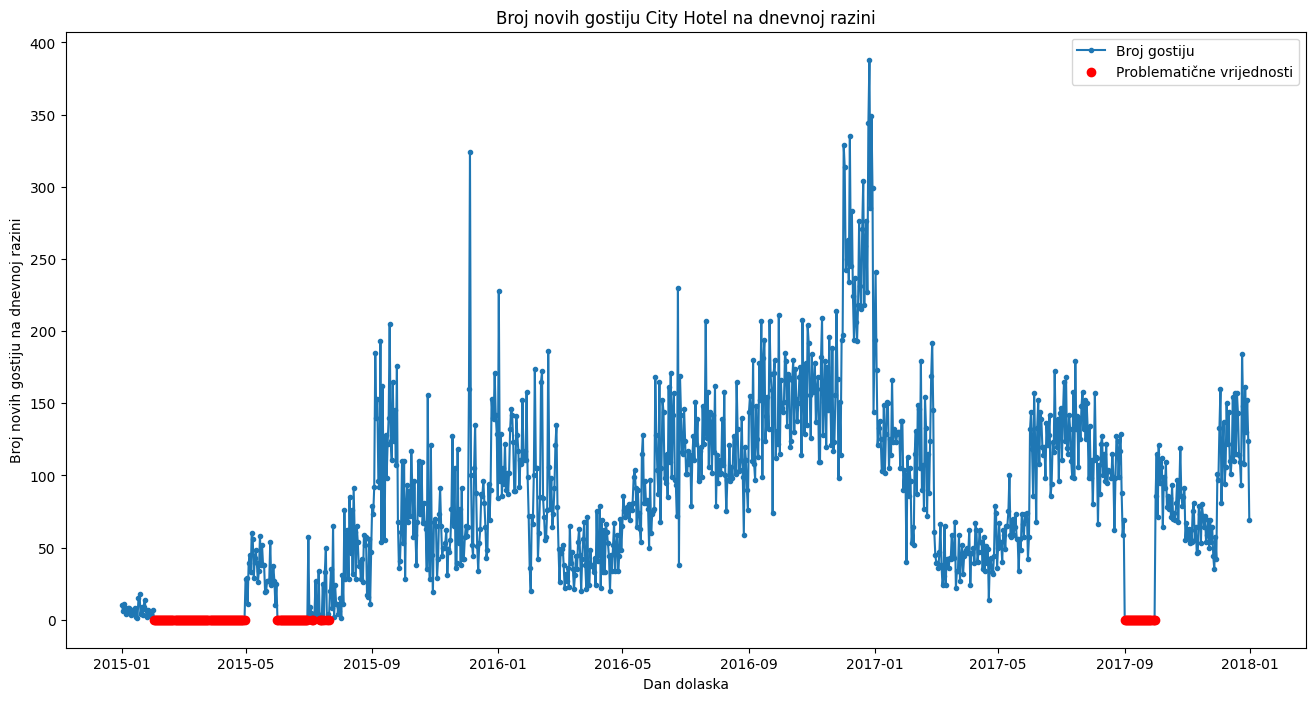

In [11]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')
plt.plot(NumberOfNewGuestsDailyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Broj novih gostiju City Hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj novih gostiju na dnevnoj razini')

plt.legend()
plt.show()

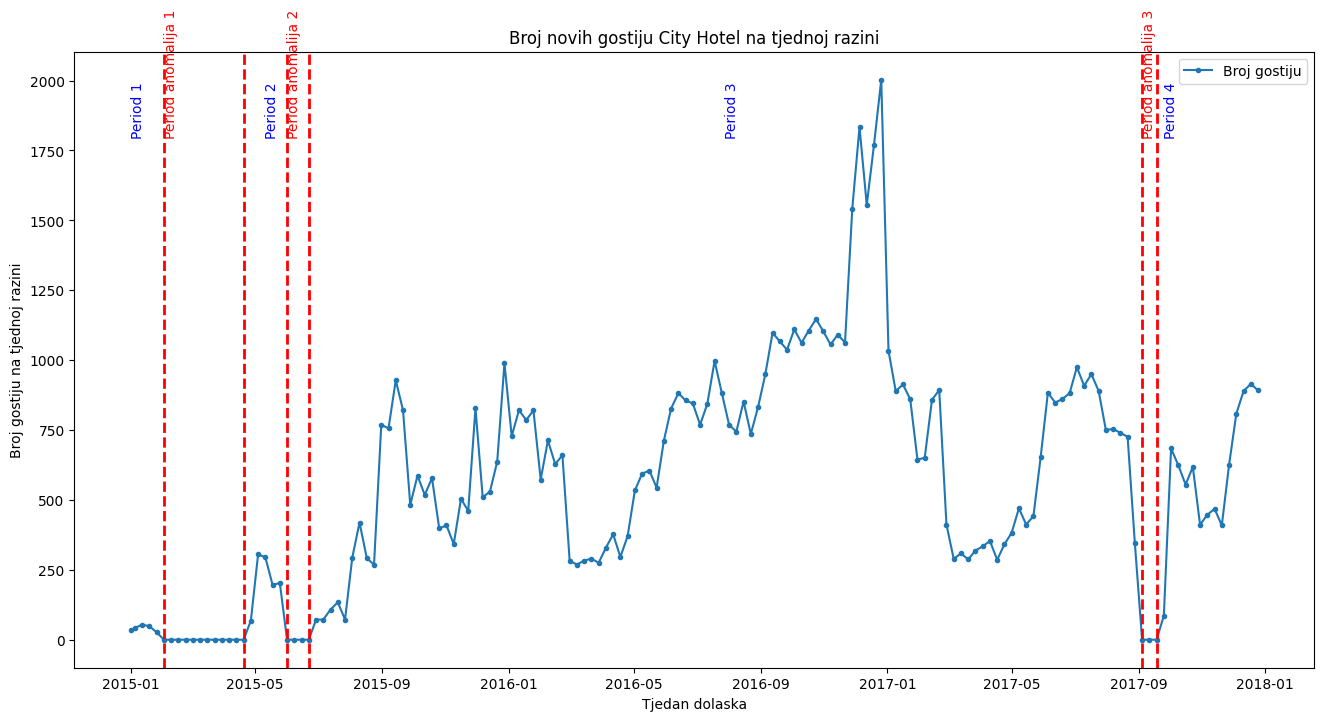

In [12]:
indexes = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]

for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i - 1]).days > 7:  
        end_date = indexes[i - 1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

plt.figure(figsize=(16, 8))
plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')

anomalous_period_count = 1
normal_period_count = 1

if periods[0][0] != NumberOfNewGuestsWeeklyCity.index.min():
    first_normal_end = periods[0][0] - pd.Timedelta(weeks=1)
    plt.text(NumberOfNewGuestsWeeklyCity.index.min(), max(NumberOfNewGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
    normal_period_count += 1

for i, (start, end) in enumerate(periods):
    plt.axvline(x=start, color='red', linestyle='--', lw=2)
    plt.axvline(x=end, color='red', linestyle='--', lw=2)
    plt.text(start, max(NumberOfNewGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period anomalija {anomalous_period_count}', color='red', rotation=90)
    anomalous_period_count += 1

    if i < len(periods) - 1:
        next_start = periods[i + 1][0]
        midpoint = pd.to_datetime((end.value + next_start.value) // 2)
        plt.text(midpoint, max(NumberOfNewGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
        normal_period_count += 1

if periods[-1][1] != NumberOfGuestsWeeklyCity.index.max():
    last_normal_start = periods[-1][1] + pd.Timedelta(weeks=1)
    plt.text(last_normal_start, max(NumberOfNewGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
    normal_period_count += 1

plt.title('Broj novih gostiju City Hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')

plt.legend()
plt.show()

KOMENTAR
- period 1, 2 te 3 označavaju periode podatak iz dataseta gdje postoji dnevni broj gostiju različit od nule, dok periodi anomalija vremenske
periode gdje je ukupan broj gostiju jedan nuli
- prvi period anomalija ćemo izbaciti iz dataseta, kao i period 1 regularnih podataka, kako se radi o kratkom peroidu validnih podataka 
 (imamo 30 dana zapisa i 88 dana bez gostiju)
- drugi period anomalija, kao i treći, razrješiti će se na sljedeći način:
   - za drugi period anomalija gledati ćemo period 2 te određeni dio perioda 3 "zdravih podataka" te izračunati daily mean te dodati tu vrijednosti danima anomalija
   - za treći period koristiti ćemo dio trećeg te četvrtog perioda zdravih podataka i na taj način amputirati podatke u dane anomalija
- ovo se treba raditi na  podatkovnom okviru s dnevnim zapisima, kako na tjednoj razini ne vidimo veću granulaciju, odnosno postoje dani (jedan ili dva u nizu) u kojima 
  nema gostiju, ali koji se "ne vide" na tjednoj bazi,ali utječu na brog gostiju

#### One Class SVM na podacima za detekciju anomalija

##### Dnevna razina 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
daily_city_data = NumberOfNewGuestsDailyCity['ukupno_gostiju'].values.reshape(-1,1)
daily_city_data_stand = scaler.fit_transform(daily_city_data)

In [15]:
from sklearn.svm import OneClassSVM

In [16]:
outliers_fraction = float(0.05)

In [17]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.001)
osvm_city.fit(daily_city_data_stand)



OneClassSVM(gamma=0.001, nu=0.05)

In [18]:
NumberOfNewGuestsDailyCity['anomaly_value_osvm'] = osvm_city.predict(daily_city_data_stand)

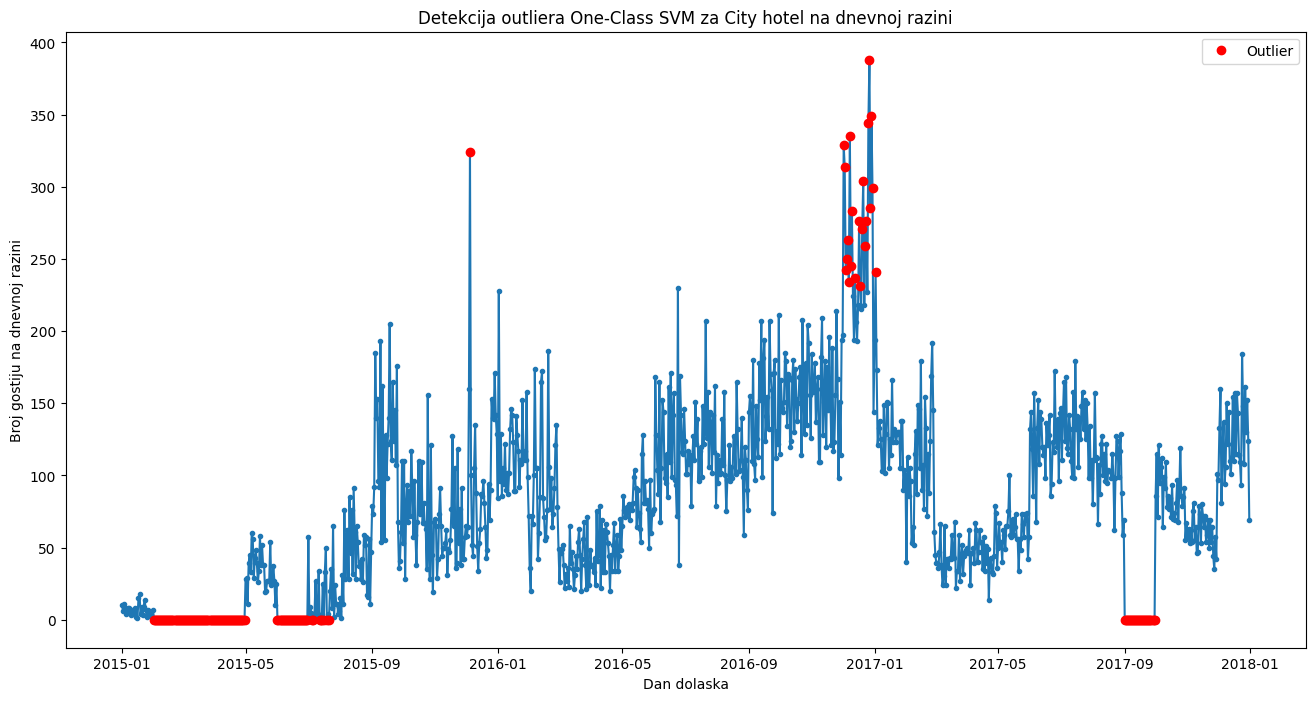

In [19]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


Zaključak je kako vrijednosti u kojima je ukupan broj novih gostiju na dnevnoj razini jednak nuli stršeća vrijednsoti te je pretpostavka bila da su te vrijednosti anomalije. Problem s ostalim detektiranim anomalijama jest uisitnu potvrdiit da su to anomalije. Zaključak je kako ćemo te vrijednosti izgladiti drugim tehnikama, a zasad bismo trebali prethodno opsiane anomalije/podatke ukloniti iz skupa podataka.

##### Tjedna razina

In [ ]:
weekly_city_data = NumberOfNewGuestsWeeklyCity['ukupno_gostiju'].values.reshape(-1,1)
weekly_city_data_stand = scaler.fit_transform(weekly_city_data)

In [ ]:
outliers_fraction = float(0.05)

In [ ]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city.fit(weekly_city_data_stand)

In [ ]:
NumberOfNewGuestsWeeklyCity['anomaly_value_osvm'] = osvm_city.predict(weekly_city_data_stand)

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()

##### Mjesečna razina

In [20]:
monthly_city_data = NumberOfNewGuestsMonthlyCity['ukupno_gostiju'].values.reshape(-1,1)
monthly_city_data_stand = scaler.fit_transform(monthly_city_data)

In [21]:
outliers_fraction = float(0.05)

In [22]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city.fit(monthly_city_data_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [23]:
NumberOfNewGuestsMonthlyCity['anomaly_value_osvm'] = osvm_city.predict(monthly_city_data_stand)

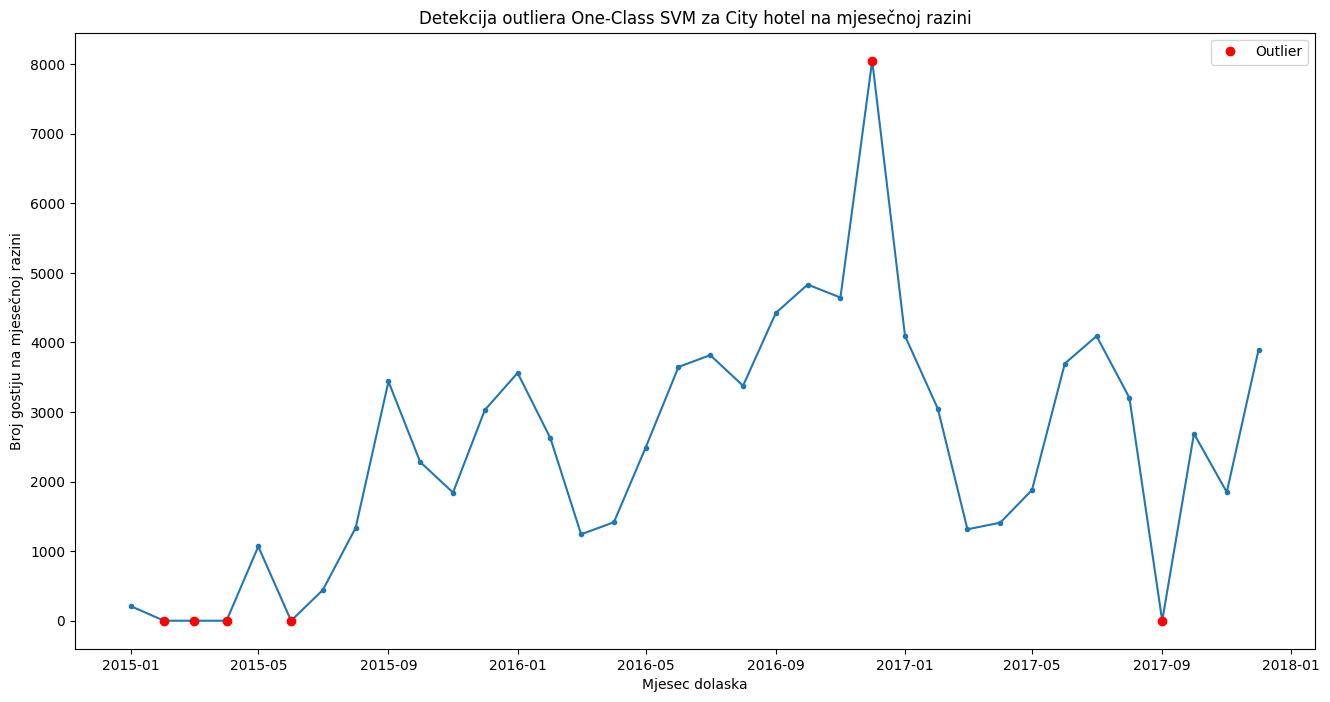

In [24]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsMonthlyCity['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsMonthlyCity[NumberOfNewGuestsMonthlyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na mjesečnoj razini')
plt.xlabel('Mjesec dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()
plt.show()


#### Brisanje, umetanje podataka i vizualizacija

1.KORAK - brisanje podataka sve do kraja prvog područja anomalija - do 30-04-2015

In [25]:
cutoff_date = pd.to_datetime('2015-04-30')
NumberOfNewGuestsDailyCity = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity.index > cutoff_date]


In [26]:
NumberOfNewGuestsDailyCity.head()

,ukupno_gostiju,prosjecna_cijena_po_osobi,anomaly_value_osvm
datum_dolaska,,,
2015-05-01,28,54.487498,1
2015-05-02,29,79.970114,1
2015-05-03,11,48.090179,1
2015-05-04,39,49.086117,1
2015-05-05,45,47.490560,1


Periodi gdje je broj gostiju jednak nuli : od 2015-06-01 do 2015-06-30, ukupno 30 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-05 do 2015-07-06, ukupno 2 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-12 do 2015-07-14, ukupno 3 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-16 do 2015-07-16, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-19 do 2015-07-19, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-07-21 do 2015-07-21, ukupno 1 dana
Periodi gdje je broj gostiju jednak nuli : od 2017-09-01 do 2017-09-30, ukupno 30 dana


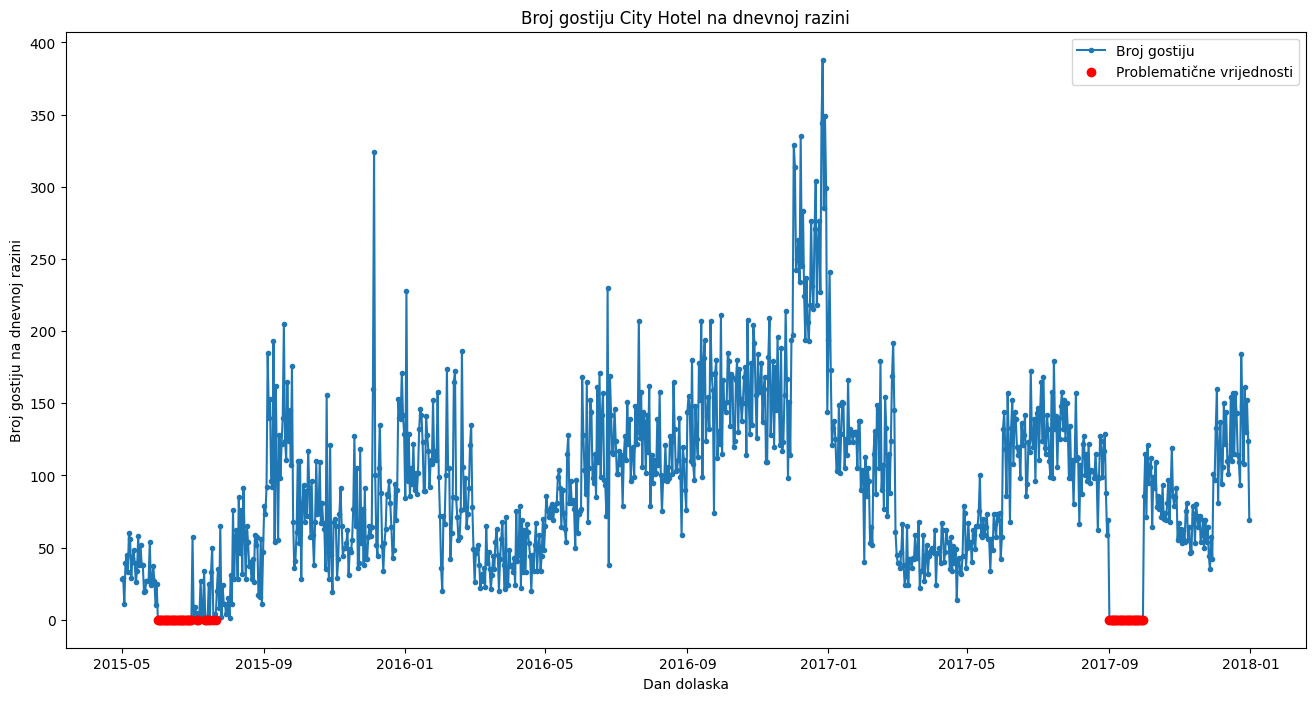

In [27]:
indexes = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]
for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days >1:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))
for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")
    
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')
plt.plot(NumberOfNewGuestsDailyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Broj gostiju City Hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')

plt.legend()
plt.show()

2.KORAK -umetanje podataka

In [28]:
indexes_valid = NumberOfNewGuestsDailyCity[NumberOfNewGuestsDailyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]
for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]).days > 1:
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    print(f"Periodi gdje je broj gostiju različit nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju različit nuli : od 2015-05-01 do 2015-05-31, ukupno 31 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-01 do 2015-07-04, ukupno 4 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-07 do 2015-07-11, ukupno 5 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-15 do 2015-07-15, ukupno 1 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-17 do 2015-07-18, ukupno 2 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-20 do 2015-07-20, ukupno 1 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-22 do 2017-08-31, ukupno 772 dana
Periodi gdje je broj gostiju različit nuli : od 2017-10-01 do 2017-12-31, ukupno 92 dana


In [29]:
def calculate_mean_for_window(start, end):
    window_data = NumberOfNewGuestsDailyCity[(NumberOfNewGuestsDailyCity.index >= start) & (NumberOfNewGuestsDailyCity.index <= end)]
    #print(window_data)
    return window_data['ukupno_gostiju'].mean(),window_data['prosjecna_cijena_po_osobi'].mean()


In [30]:
for start, end in periods:
    period_length = (end - start).days

    if period_length == 1:
        window_start_before = start - pd.Timedelta(days=1)
        window_end_after = end + pd.Timedelta(days=1)
    elif period_length < 3:
        window_start_before = start - pd.Timedelta(days=4) #moguće mijenati veličinu prozora
        window_end_after = end + pd.Timedelta(days=4) #moguće mijenati veličinu prozora
    else:
        window_start_before = start - pd.Timedelta(days=6) #moguće mijenati veličinu prozora
        window_end_after = end + pd.Timedelta(days=6) #moguće mijenati veličinu prozora

    window_start_before = max(window_start_before, NumberOfNewGuestsDailyCity.index.min())
    window_end_after = min(window_end_after, NumberOfNewGuestsDailyCity.index.max())
    
    mean_before, mean_price_before = calculate_mean_for_window(window_start_before, start - pd.Timedelta(days=1))
    mean_after,mean_price_after = calculate_mean_for_window(end + pd.Timedelta(days=1), window_end_after)
    
    mean_value = (mean_before + mean_after) / 2
    mean_price = (mean_price_before + mean_price_after) / 2
    
    for day in pd.date_range(start, end):
        if day in NumberOfNewGuestsDailyCity.index:
            variance_percentage = random.uniform(-0.2, 0.2)  # +/- 20%  varijance kako bismo simulirali stvarne podatke
            varied_mean_value = mean_value + (mean_value * variance_percentage)
            mean_price = mean_price + (mean_price * random.uniform(-0.05, 0.05))
            NumberOfNewGuestsDailyCity.at[day, 'ukupno_gostiju'] = varied_mean_value
            NumberOfNewGuestsDailyCity.at[day, 'prosjecna_cijena_po_osobi'] = mean_price

C:\Temp\ipykernel_28540\3257159828.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.730132108281744' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  NumberOfNewGuestsDailyCity.at[day, 'ukupno_gostiju'] = varied_mean_value


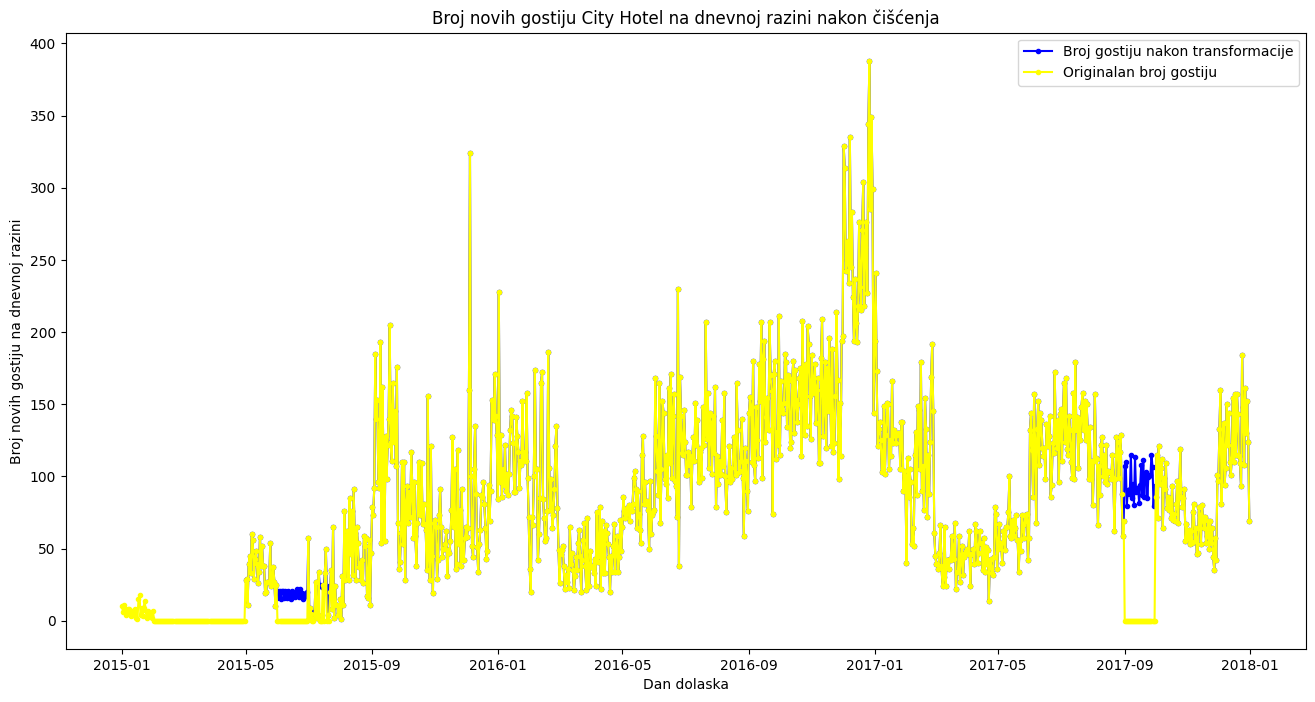

In [31]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsDailyCity['ukupno_gostiju'], marker='.', label='Broj gostiju nakon transformacije', color='blue')
plt.plot(NumberOfNewGuestsDailyCityCopy['ukupno_gostiju'], marker='.', label='Originalan broj gostiju', color='yellow')

plt.title('Broj novih gostiju City Hotel na dnevnoj razini nakon čišćenja')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj novih gostiju na dnevnoj razini')

plt.legend()
plt.show()


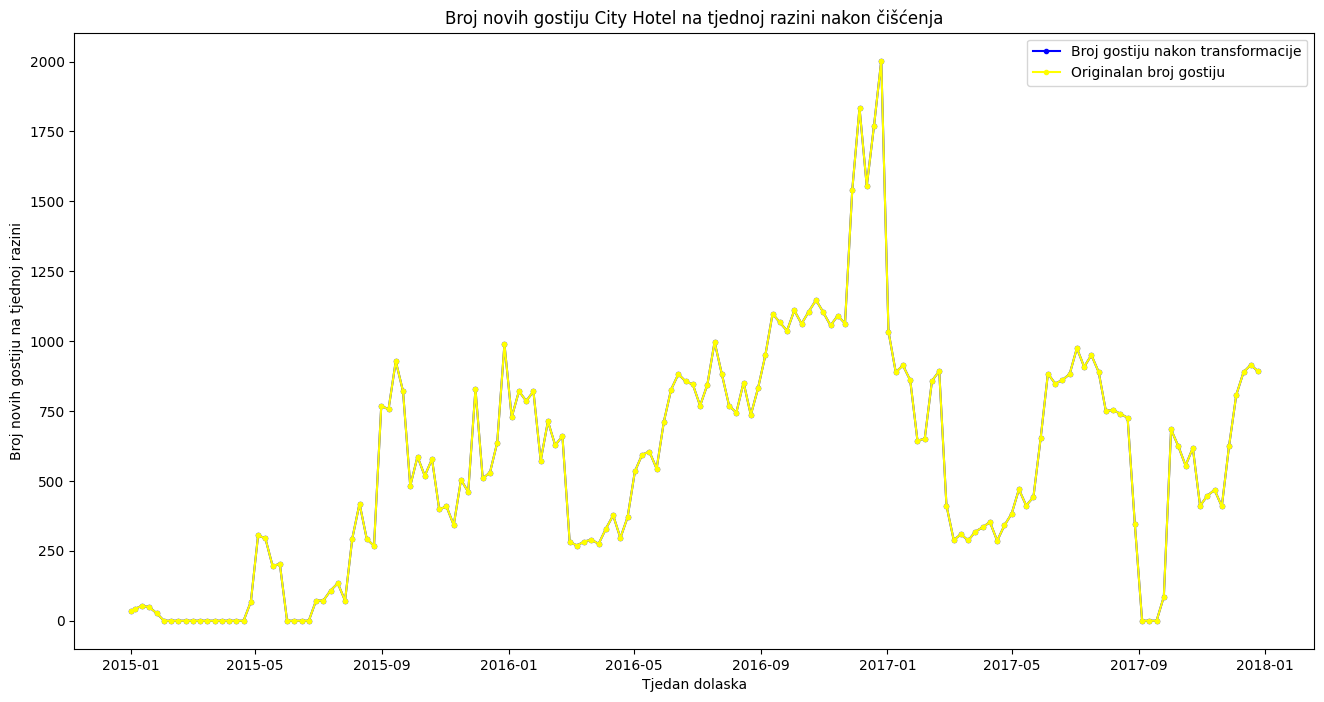

In [32]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju nakon transformacije', color='blue')

plt.plot(NumberOfNewGuestsWeeklyCityCopy['ukupno_gostiju'], marker='.', label='Originalan broj gostiju' , color='yellow')

plt.title('Broj novih gostiju City Hotel na tjednoj razini nakon čišćenja')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj novih gostiju na tjednoj razini')

plt.legend()
plt.show()

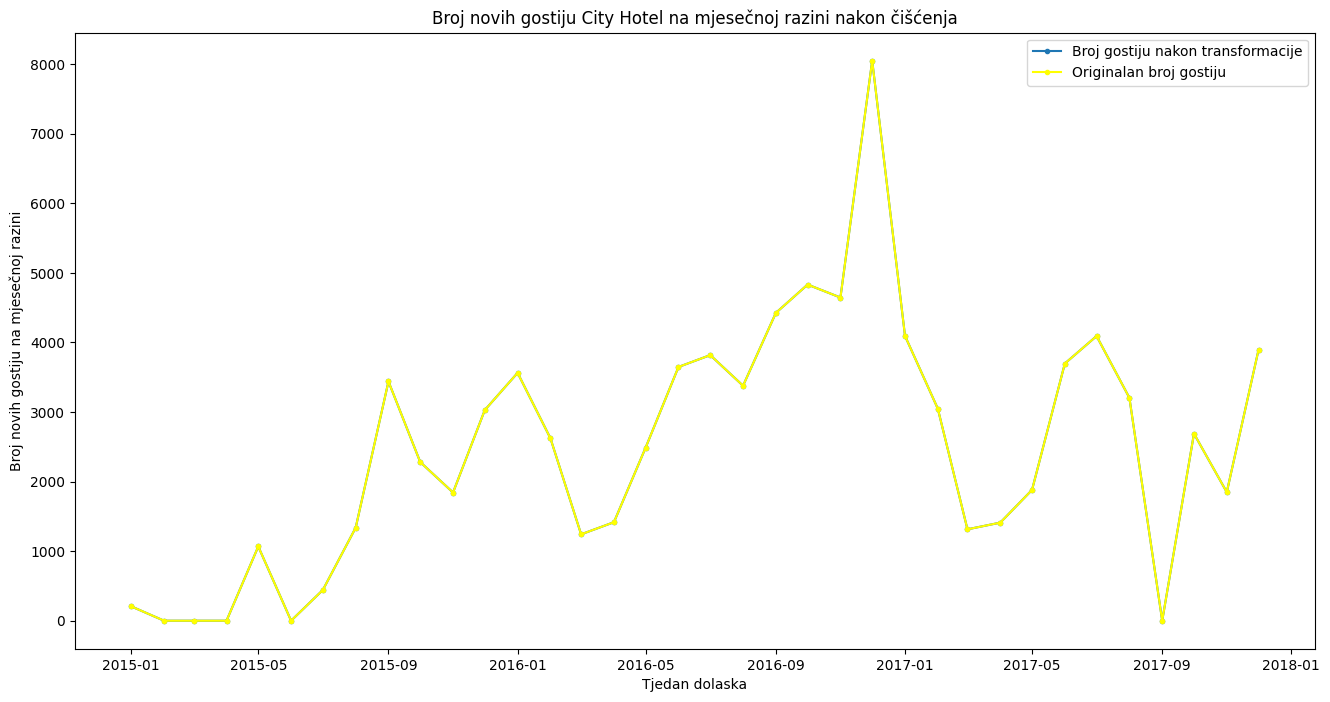

In [33]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsMonthlyCity['ukupno_gostiju'], marker='.', label='Broj gostiju nakon transformacije')

plt.plot(NumberOfNewGuestsMonthlyCityCopy['ukupno_gostiju'], marker='.', label='Originalan broj gostiju', color='yellow')
plt.title('Broj novih gostiju City Hotel na mjesečnoj razini nakon čišćenja')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj novih gostiju na mjesečnoj razini')

plt.legend()
plt.show()

#### One Class SVM na tranformiranom skupu podataka

In [34]:
weekly_city_data = NumberOfNewGuestsWeeklyCity['ukupno_gostiju'].values.reshape(-1,1)
weekly_city_data_stand = scaler.fit_transform(weekly_city_data)

In [35]:
outliers_fraction = float(0.01)

In [36]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city.fit(weekly_city_data_stand)



OneClassSVM(gamma=0.01, nu=0.01)

In [37]:
NumberOfNewGuestsWeeklyCity['anomaly_value_osvm'] = osvm_city.predict(weekly_city_data_stand)

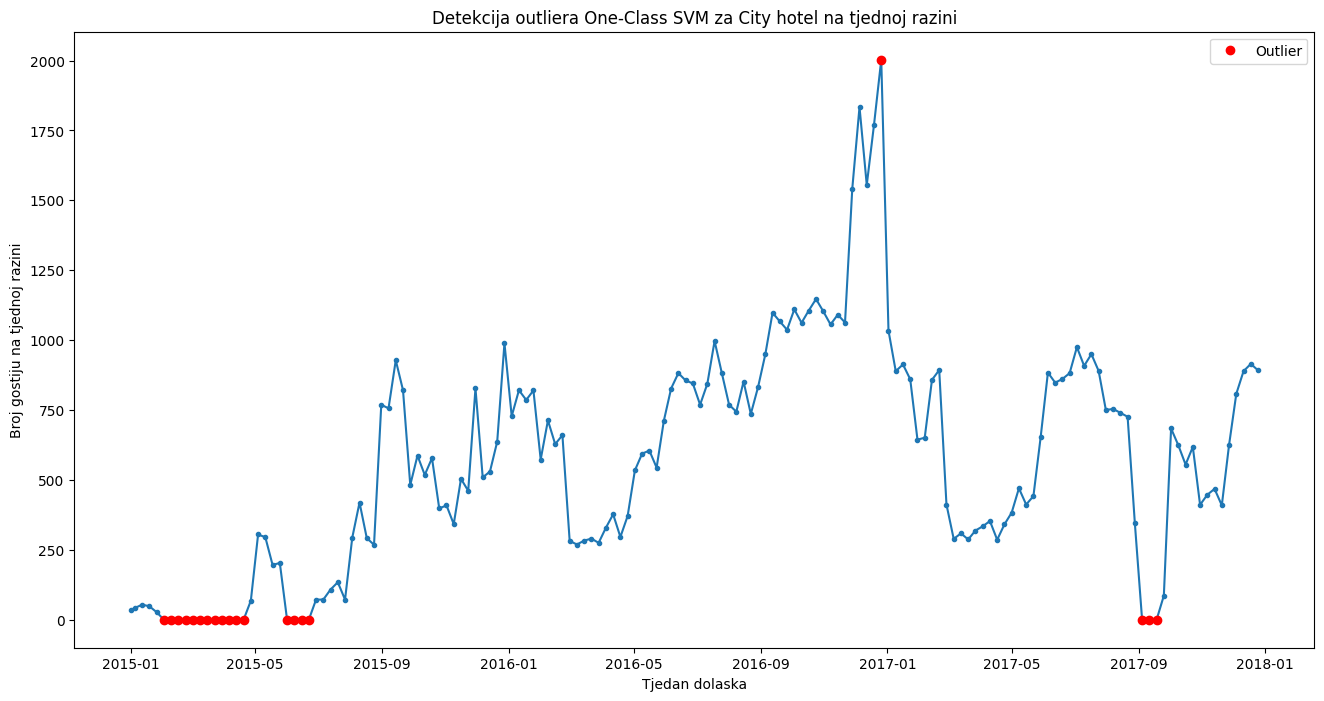

In [38]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


## Zaglađivanje anomalija broja svih gostiju kod City Hotela (hotel ID 1)

### Dnevna razina

In [39]:
indexes = NumberOfGuestsDailyCity[NumberOfGuestsDailyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]
for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days > 1:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju jednak nuli : od 2015-02-07 do 2015-04-30, ukupno 83 dana
Periodi gdje je broj gostiju jednak nuli : od 2015-06-10 do 2015-06-30, ukupno 21 dana
Periodi gdje je broj gostiju jednak nuli : od 2017-09-08 do 2017-09-30, ukupno 23 dana


Manji broj perioda u kojima je broj gostiju jednak nuli, što je logično, kako su kraći periodi gdje je broj dolazaka 0 samo smanjili broj gostiju na razini hotela.

In [40]:
indexes_valid = NumberOfGuestsDailyCity[NumberOfGuestsDailyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]
for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]).days > 1:
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    print(f"Periodi gdje je broj gostiju različit nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju različit nuli : od 2015-01-01 do 2015-02-06, ukupno 37 dana
Periodi gdje je broj gostiju različit nuli : od 2015-05-01 do 2015-06-09, ukupno 40 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-01 do 2017-09-07, ukupno 800 dana
Periodi gdje je broj gostiju različit nuli : od 2017-10-01 do 2018-01-14, ukupno 106 dana


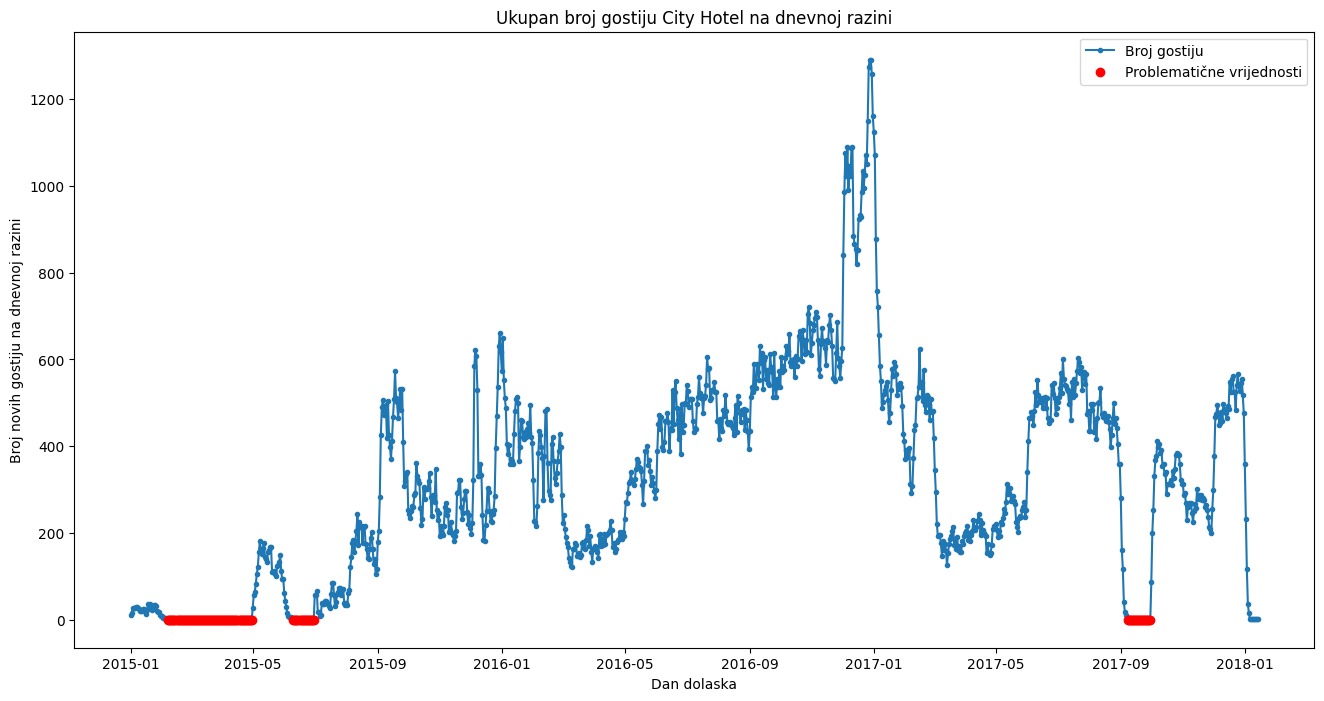

In [41]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsDailyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')
plt.plot(NumberOfGuestsDailyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Ukupan broj gostiju City Hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj novih gostiju na dnevnoj razini')

plt.legend()
plt.show()

2015-02-09 00:00:00 2015-04-20 00:00:00
2015-06-15 00:00:00 2015-06-22 00:00:00
2017-09-11 00:00:00 2017-09-18 00:00:00


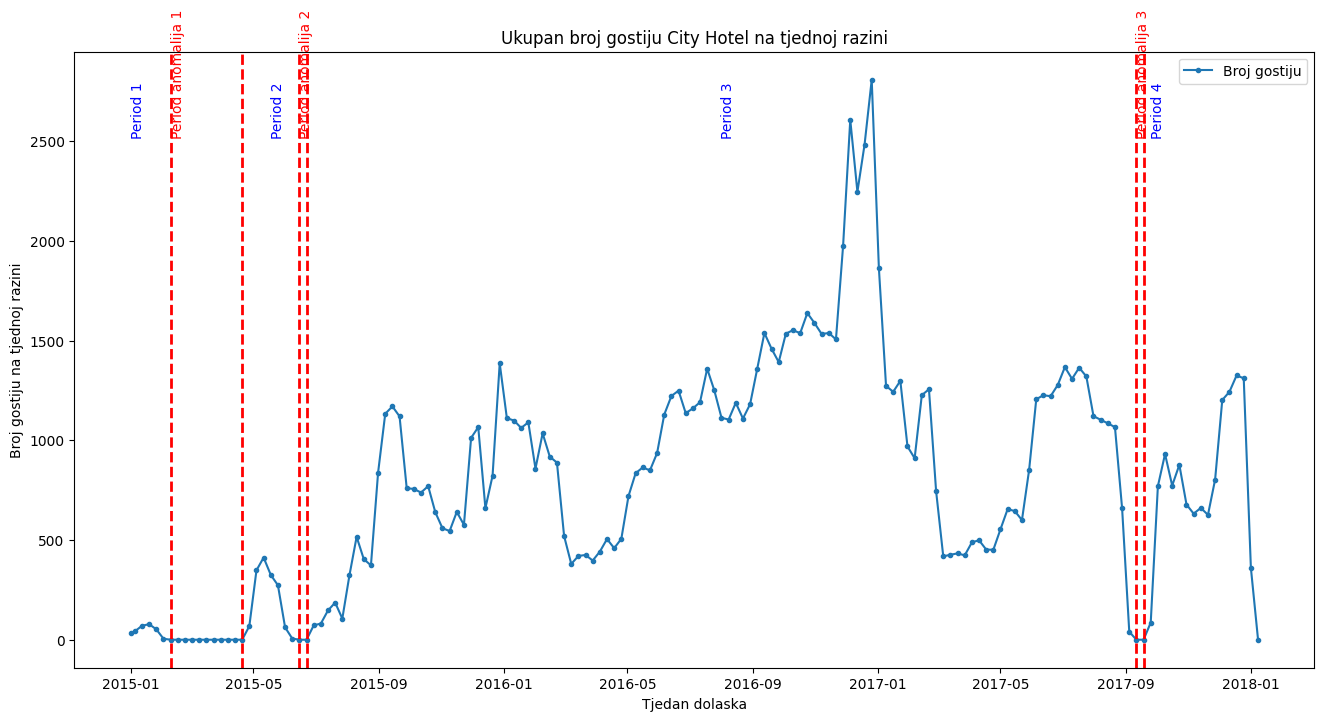

In [42]:
indexes = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]

for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i - 1]).days > 7:  
        end_date = indexes[i - 1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

plt.figure(figsize=(16, 8))
plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')

anomalous_period_count = 1
normal_period_count = 1

if periods[0][0] != NumberOfGuestsWeeklyCity.index.min():
    first_normal_end = periods[0][0] - pd.Timedelta(weeks=1)
    plt.text(NumberOfGuestsWeeklyCity.index.min(), max(NumberOfGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
    normal_period_count += 1

for i, (start, end) in enumerate(periods):
    print(start,end)
    plt.axvline(x=start, color='red', linestyle='--', lw=2)
    plt.axvline(x=end, color='red', linestyle='--', lw=2)
    plt.text(start, max(NumberOfGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period anomalija {anomalous_period_count}', color='red', rotation=90)
    anomalous_period_count += 1

    if i < len(periods) - 1:
        next_start = periods[i + 1][0]
        midpoint = pd.to_datetime((end.value + next_start.value) // 2)
        plt.text(midpoint, max(NumberOfGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
        normal_period_count += 1

if periods[-1][1] != NumberOfGuestsWeeklyCity.index.max():
    last_normal_start = periods[-1][1] + pd.Timedelta(weeks=1)
    plt.text(last_normal_start, max(NumberOfGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
    normal_period_count += 1

plt.title('Ukupan broj gostiju City Hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')

plt.legend()
plt.show()

KOMENTAR
- period 1, 2 te 3 označavaju periode podatak iz dataseta gdje postoji dnevni broj gostiju različit od nule, dok periodi anomalija vremenske
periode gdje je ukupan broj gostiju jedan nuli
- prvi period anomalija ćemo izbaciti iz dataseta, kao i period 1 regularnih podataka, kako se radi o kratkom peroidu validnih podataka 
 (imamo 30 dana zapisa i 88 dana bez gostiju)
- drugi period anomalija, kao i treći, razrješiti će se na sljedeći način:
   - za drugi period anomalija gledati ćemo period 2 te određeni dio perioda 3 "zdravih podataka" te izračunati daily mean te dodati tu vrijednosti danima anomalija
   - za treći period koristiti ćemo dio trećeg te četvrtog perioda zdravih podataka i na taj način amputirati podatke u dane anomalija


#### One Class SVM na podacima za detekciju anomalija

##### Dnevna razina 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
daily_city_data_total_guests = NumberOfGuestsDailyCity['ukupno_gostiju'].values.reshape(-1,1)
daily_city_data_total_guests_stand = scaler.fit_transform(daily_city_data_total_guests)

In [45]:
from sklearn.svm import OneClassSVM

In [46]:
outliers_fraction = float(0.05)

In [47]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city.fit(daily_city_data_total_guests_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [48]:
NumberOfGuestsDailyCity['anomaly_value_osvm'] = osvm_city.predict(daily_city_data_total_guests_stand)
   

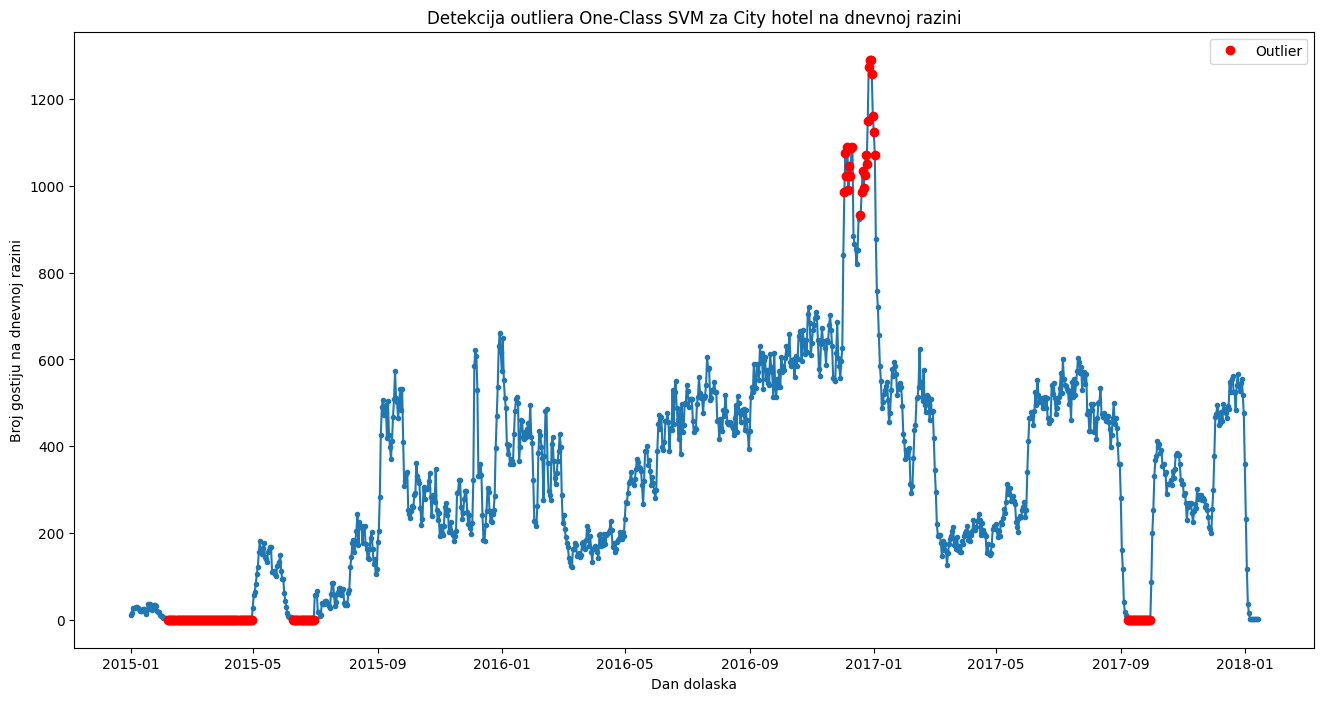

In [49]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsDailyCity['ukupno_gostiju'], marker='.')

anomalies_osvm_total = NumberOfGuestsDailyCity[NumberOfGuestsDailyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')
plt.legend()
plt.show()


##### Tjedna razina 

In [50]:
weekly_city_data_total_guests = NumberOfGuestsWeeklyCity['ukupno_gostiju'].values.reshape(-1,1)
weekly_city_data_total_guests_stand = scaler.fit_transform(weekly_city_data_total_guests)

In [51]:
outliers_fraction = float(0.05)

In [52]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.001)
osvm_city.fit(weekly_city_data_total_guests_stand)



OneClassSVM(gamma=0.001, nu=0.05)

In [53]:
NumberOfGuestsWeeklyCity['anomaly_value_osvm'] = osvm_city.predict(weekly_city_data_total_guests_stand)

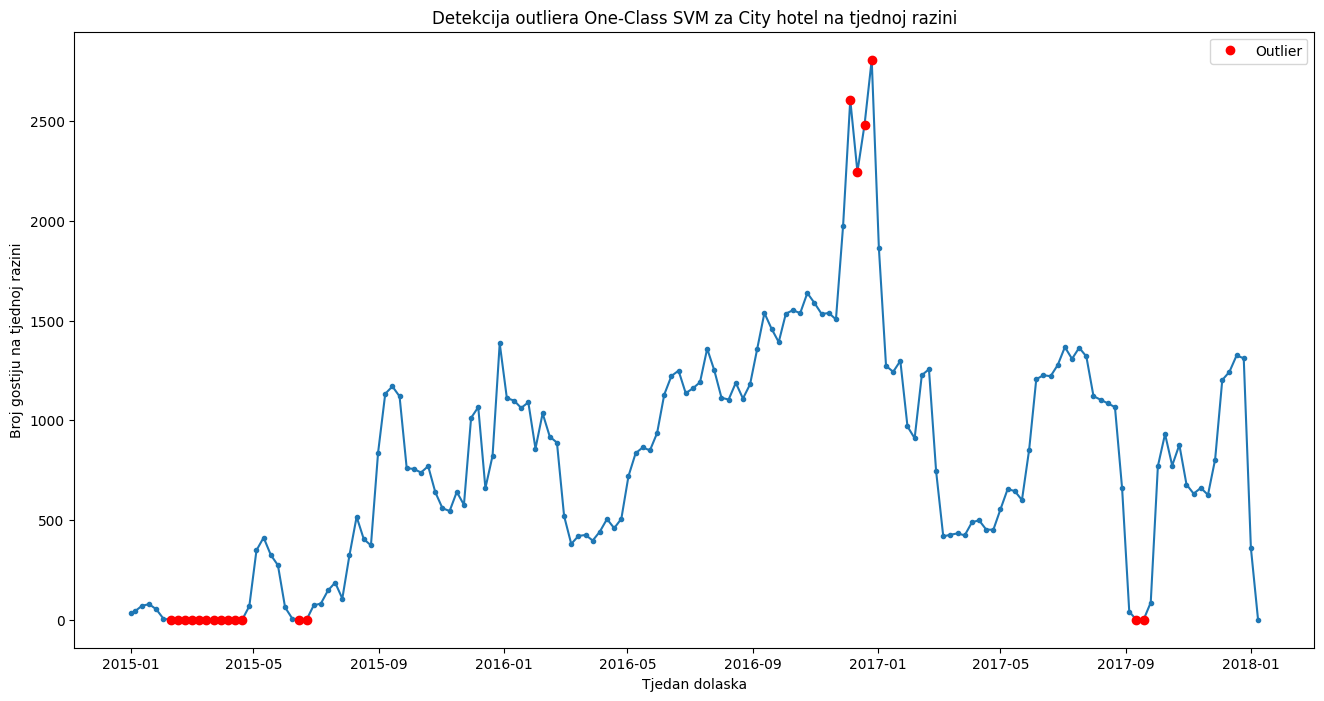

In [54]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.')

anomalies_osvm_total = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


##### Mjesečna razina 

In [55]:
monthly_city_data_total_guests = NumberOfGuestsMonthlyCity['ukupno_gostiju'].values.reshape(-1,1)
monthly_city_data_total_guests_stand = scaler.fit_transform(monthly_city_data_total_guests)

In [56]:
outliers_fraction = float(0.05)

In [57]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.001)
osvm_city.fit(monthly_city_data_total_guests_stand)



OneClassSVM(gamma=0.001, nu=0.05)

In [58]:
NumberOfGuestsMonthlyCity['anomaly_value_osvm'] = osvm_city.predict(monthly_city_data_total_guests_stand)

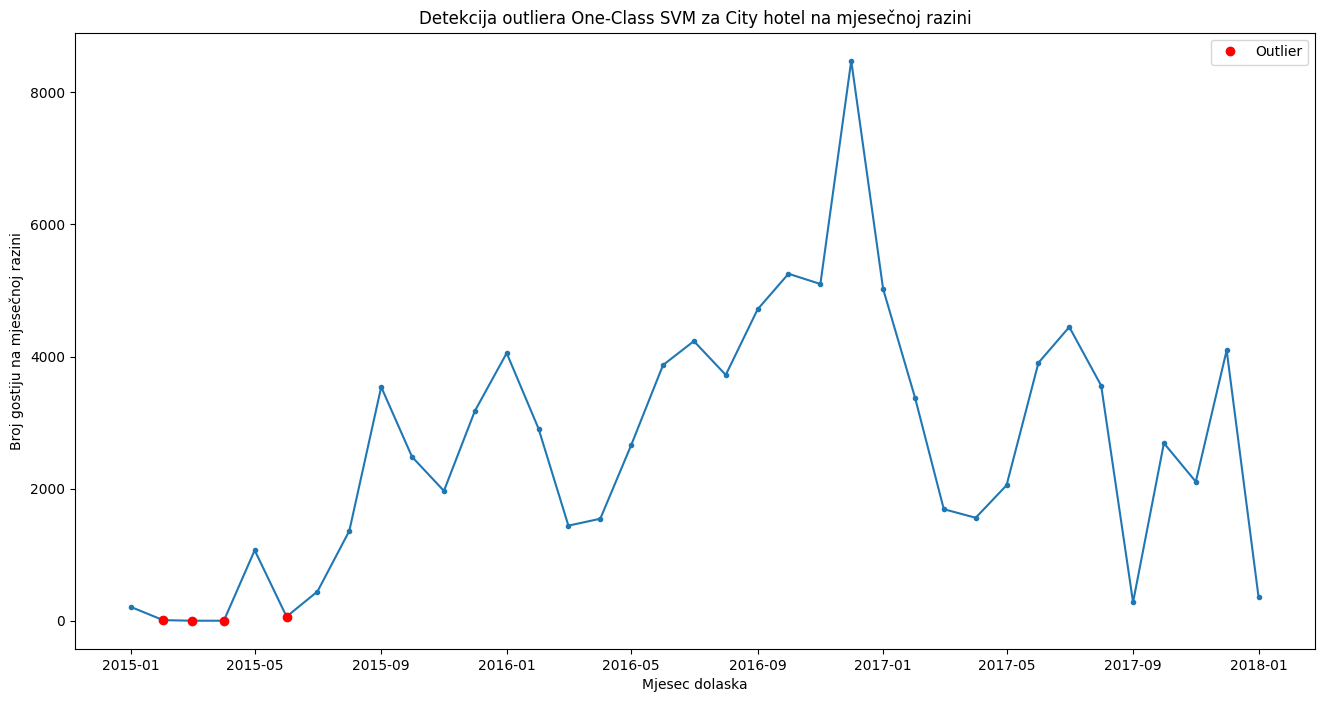

In [59]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsMonthlyCity['ukupno_gostiju'], marker='.')

anomalies_osvm_total = NumberOfGuestsMonthlyCity[NumberOfGuestsMonthlyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm_total['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na mjesečnoj razini')
plt.xlabel('Mjesec dolaska')
plt.ylabel('Broj gostiju na mjesečnoj razini')
plt.legend()
plt.show()


#### Brisanje, umetanje podataka i vizualizacija

1.KORAK - brisanje podataka sve do kraja prvog područja anomalija - do 30-04-2015

In [60]:
cutoff_date = pd.to_datetime('2015-04-30')
NumberOfGuestsDailyCity = NumberOfGuestsDailyCity[NumberOfGuestsDailyCity.index > cutoff_date]


In [61]:
NumberOfGuestsDailyCity.head(5)

,ukupno_gostiju,prosjecna_cijena_po_osobi,anomaly_value_osvm
2015-05-01,28,54.487498,1
2015-05-02,57,67.452338,1
2015-05-03,65,64.041554,1
2015-05-04,82,58.774365,1
2015-05-05,106,46.966726,1


Periodi gdje je broj gostiju jednak nuli : od 2015-06-10 do 2015-06-30, ukupno 21 dana
Periodi gdje je broj gostiju jednak nuli : od 2017-09-08 do 2017-09-30, ukupno 23 dana


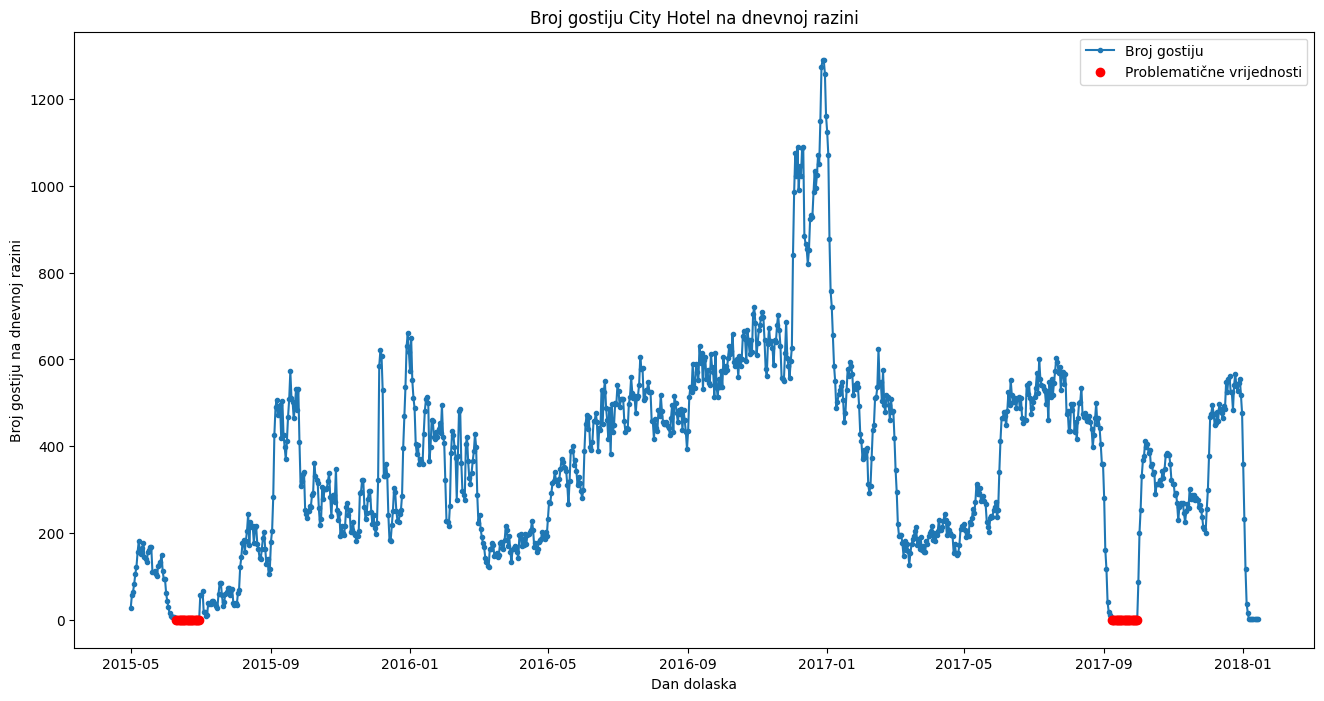

In [62]:
indexes = NumberOfGuestsDailyCity[NumberOfGuestsDailyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]
for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days >1:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))
for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")
    
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsDailyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')
plt.plot(NumberOfGuestsDailyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Broj gostiju City Hotel na dnevnoj razini')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')

plt.legend()
plt.show()

Problematično je gledati samo dane kada je dolaznost novih gostiju nula, kako ovdje govorimo o ukupnom broju gostiju. Jasno je da želimo i okolne točke oko točaka gdje je ukupan broj gostiju jednak nuli isto tako tranformirati, kako je u tim točkama dolaznost novih ljudi jednaka nuli. Ukoliko to ne bismo napravili, a kako klizećim prozorom uzimamo lokalno susjedne točke, dobili bismo liniju koja odudara od prethodnih valjanih perioda, odnosno linija bi bila slična lokalnim točkama u kojima je broj gostiju različit od nule, ali jako blizu nuli, kako se u tim točkama dolaznost smanjila na 0

KOMENTAR: Ove raspone dana dobili smo uvidom u indekse anomalija za broj novih gostiju na dnevnoj razini

In [63]:
date_range_1 = pd.date_range(start='2015-06-01', end='2015-06-09', freq='D')
date_range_2 = pd.date_range(start='2017-09-01', end='2017-09-08', freq='D')
date_range_3 = pd.date_range(start='2017-08-30', end='2017-10-04', freq='D') 

In [64]:
indexes =indexes.union(date_range_1).union(date_range_2).union(date_range_3)

Periodi gdje je broj gostiju jednak nuli : od 2015-06-01 do 2015-06-30, ukupno 30 dana
Periodi gdje je broj gostiju jednak nuli : od 2017-08-30 do 2017-10-04, ukupno 36 dana


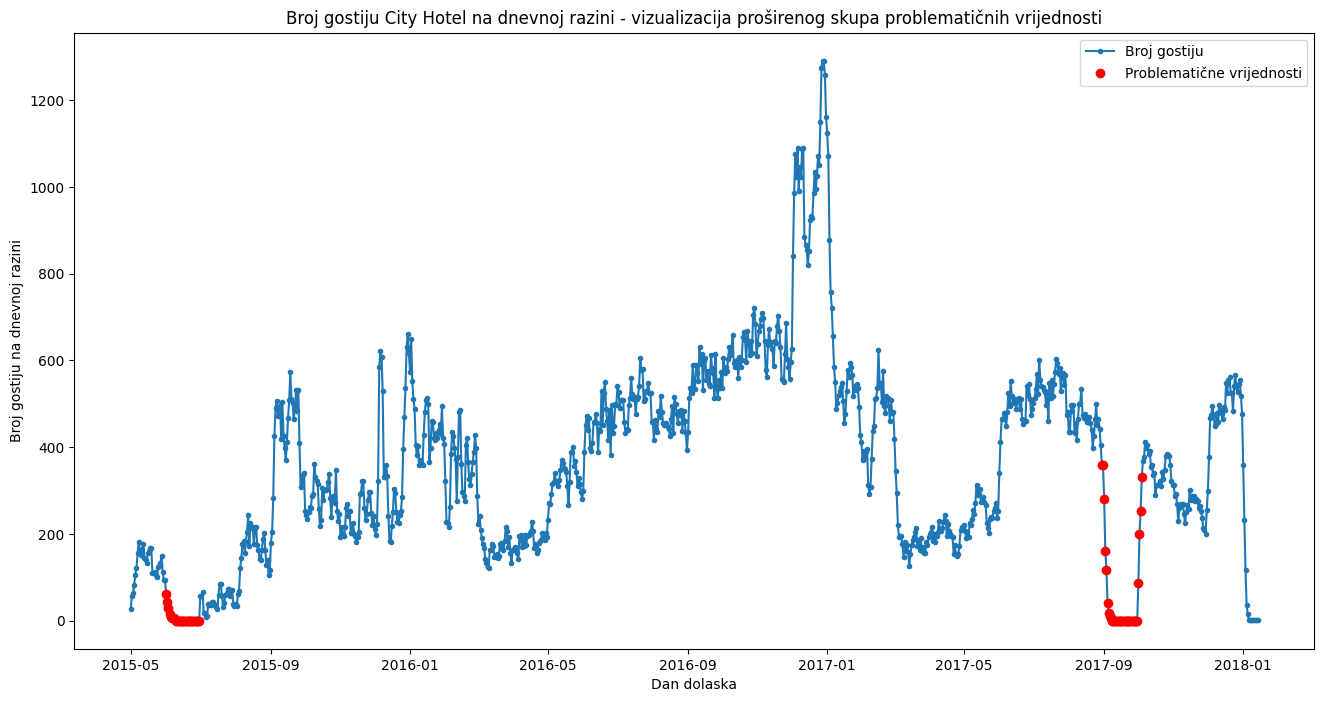

In [65]:
periods = []
start_date = indexes[0]
for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days >1:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))
for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")
    
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsDailyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')
plt.plot(NumberOfGuestsDailyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Broj gostiju City Hotel na dnevnoj razini - vizualizacija proširenog skupa problematičnih vrijednosti')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj gostiju na dnevnoj razini')

plt.legend()
plt.show()

2.KORAK -umetanje podataka

In [66]:
indexes_valid = NumberOfGuestsDailyCity[NumberOfGuestsDailyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]
for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]).days > 1:
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    print(f"Periodi gdje je broj gostiju različit nuli : od {start.date()} do {end.date()}, ukupno {(end - start).days+1} dana")

Periodi gdje je broj gostiju različit nuli : od 2015-05-01 do 2015-06-09, ukupno 40 dana
Periodi gdje je broj gostiju različit nuli : od 2015-07-01 do 2017-09-07, ukupno 800 dana
Periodi gdje je broj gostiju različit nuli : od 2017-10-01 do 2018-01-14, ukupno 106 dana


In [67]:
def calculate_mean_for_window(start, end):
    window_data = NumberOfGuestsDailyCity[(NumberOfGuestsDailyCity.index >= start) & (NumberOfGuestsDailyCity.index <= end)]
    #print(window_data)
    return window_data['ukupno_gostiju'].mean(),window_data['prosjecna_cijena_po_osobi'].mean()

In [68]:
for start, end in periods:
    period_length = (end - start).days

    if period_length == 1:
        window_start_before = start - pd.Timedelta(days=1)
        window_end_after = end + pd.Timedelta(days=1)
    elif period_length < 3:
        window_start_before = start - pd.Timedelta(days=7) #moguće mijenati veličinu prozora
        window_end_after = end + pd.Timedelta(days=7) #moguće mijenati veličinu prozora
    else:
        window_start_before = start - pd.Timedelta(days=3) #moguće mijenati veličinu prozora
        window_end_after = end + pd.Timedelta(days=3) #moguće mijenati veličinu prozora

    window_start_before = max(window_start_before, NumberOfGuestsDailyCity.index.min())
    window_end_after = min(window_end_after, NumberOfGuestsDailyCity.index.max())

    mean_before, mean_price_before = calculate_mean_for_window(window_start_before, start - pd.Timedelta(days=1))
    mean_after,mean_price_after = calculate_mean_for_window(end + pd.Timedelta(days=1), window_end_after)

    mean_value = (mean_before + mean_after) / 2
    mean_price = (mean_price_before + mean_price_after) / 2
    for day in pd.date_range(start, end):
        if day in NumberOfGuestsDailyCity.index:
            if mean_value < 300:
                variance_percentage = random.uniform(-0.2, 0.2)  # +/- 10%  varijance kako bismo simulirali stvarne podatke
            else:
                variance_percentage = random.uniform(-0.1, 0.1)  # +/- 10%  varijance kako bismo simulirali stvarne podatke
                
            mean_price = mean_price + (mean_price * random.uniform(-0.05, 0.05))
            varied_mean_value = mean_value + (mean_value * variance_percentage)
            NumberOfGuestsDailyCity.at[day, 'ukupno_gostiju'] = varied_mean_value
            NumberOfGuestsDailyCity.at[day, 'prosjecna_cijena_po_osobi'] = mean_price

C:\Temp\ipykernel_28540\2328911596.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '71.12622009535' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  NumberOfGuestsDailyCity.at[day, 'ukupno_gostiju'] = varied_mean_value


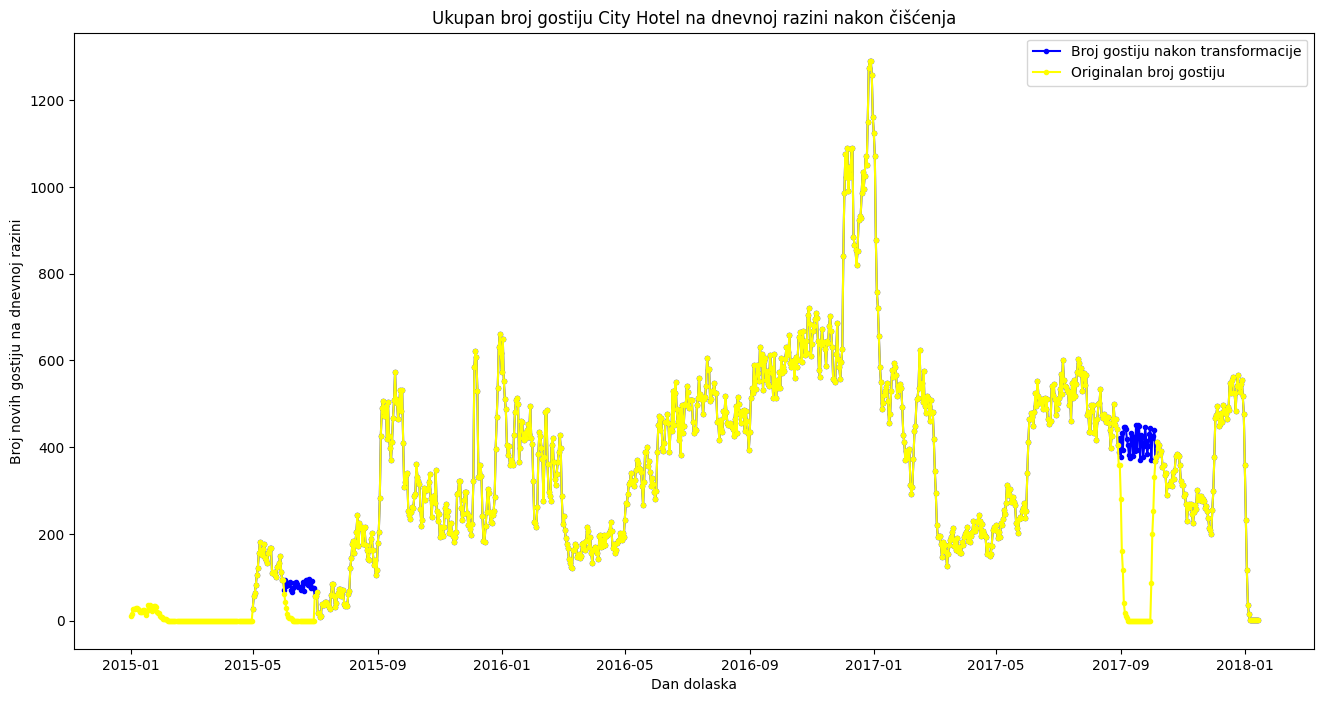

In [69]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsDailyCity['ukupno_gostiju'], marker='.', label='Broj gostiju nakon transformacije', color='blue')
plt.plot(NumberOfGuestsDailyCityCopy['ukupno_gostiju'], marker='.', label='Originalan broj gostiju', color='yellow')

plt.title('Ukupan broj gostiju City Hotel na dnevnoj razini nakon čišćenja')
plt.xlabel('Dan dolaska')
plt.ylabel('Broj novih gostiju na dnevnoj razini')

plt.legend()
plt.show()


### Tjedna razina

In [70]:
indexes = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = None

for i in range(len(indexes)):
    if start_date is None:
        start_date = indexes[i]
    if i == len(indexes) - 1 or (indexes[i + 1] - indexes[i]) > pd.Timedelta(weeks=1):
        end_date = indexes[i]
        periods.append((start_date, end_date))
        start_date = None

for start, end in periods:
    total_weeks = (end - start) / pd.Timedelta(weeks=1) + 1
    print(f"Periodi gdje je broj gostiju jednak nuli: od {start.date()} do {end.date()}, ukupno {int(total_weeks)} tjedna")


Periodi gdje je broj gostiju jednak nuli: od 2015-02-09 do 2015-04-20, ukupno 11 tjedna
Periodi gdje je broj gostiju jednak nuli: od 2015-06-15 do 2015-06-22, ukupno 2 tjedna
Periodi gdje je broj gostiju jednak nuli: od 2017-09-11 do 2017-09-18, ukupno 2 tjedna


In [71]:
indexes_valid = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]

for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]) > pd.Timedelta(weeks=1):
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    total_weeks = (end - start) / pd.Timedelta(weeks=1) + 1
    print(f"Periodi s gostima: od {start.date()} do {end.date()}, ukupno {int(total_weeks)} tjedna")


Periodi s gostima: od 2015-01-01 do 2015-02-02, ukupno 5 tjedna
Periodi s gostima: od 2015-04-27 do 2015-06-08, ukupno 7 tjedna
Periodi s gostima: od 2015-06-29 do 2017-09-04, ukupno 115 tjedna
Periodi s gostima: od 2017-09-25 do 2018-01-08, ukupno 16 tjedna


Periodi s gostima: od 2015-05-04 do 2015-06-08, ukupno 6 tjedna
Periodi s gostima: od 2015-06-29 do 2017-09-04, ukupno 115 tjedna
Periodi s gostima: od 2017-09-25 do 2018-01-08, ukupno 16 tjedna


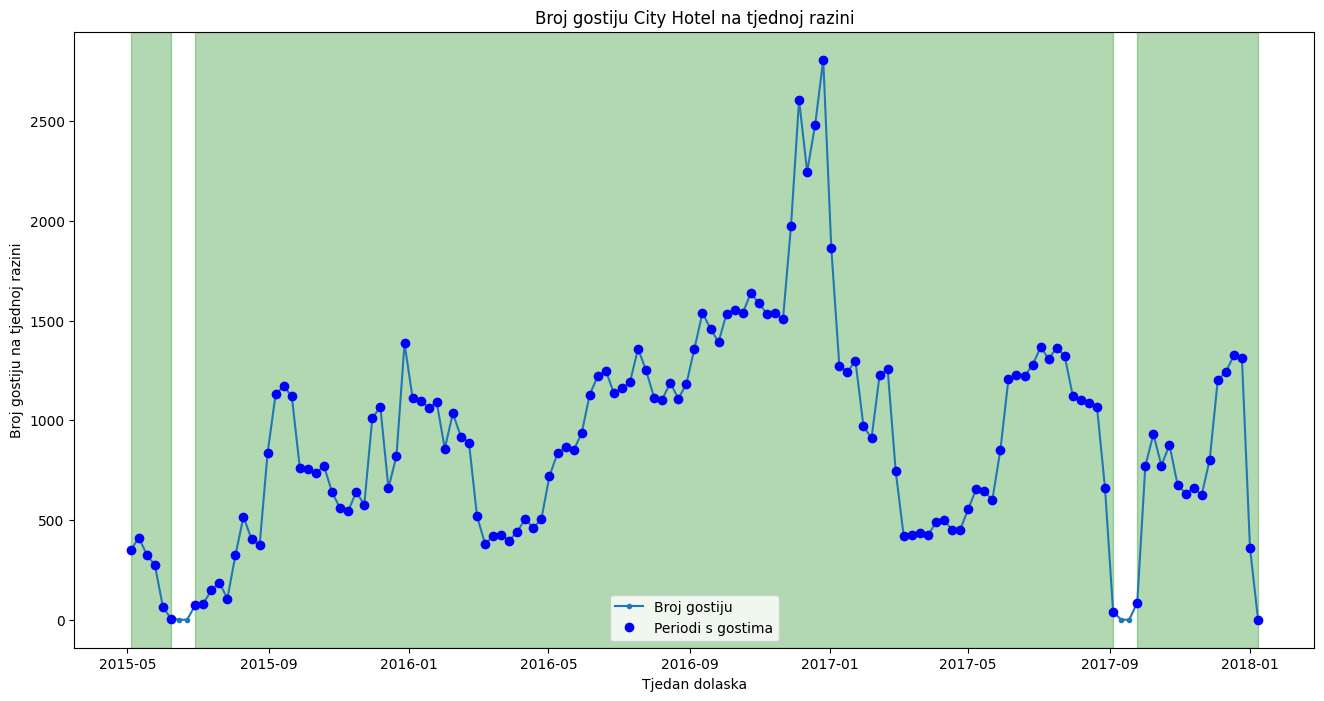

In [104]:
indexes_valid = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]

for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]).days > 7:
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    print(f"Periodi s gostima: od {start.date()} do {end.date()}, ukupno {(end - start).days // 7 + 1} tjedna")

plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')

for start, end in periods_valid:
    plt.axvspan(start, end, color='green', alpha=0.3)

plt.plot(NumberOfGuestsWeeklyCity.loc[indexes_valid, 'ukupno_gostiju'], 'o', color='blue', label='Periodi s gostima')

plt.title('Broj gostiju City Hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')

plt.legend()
plt.show()


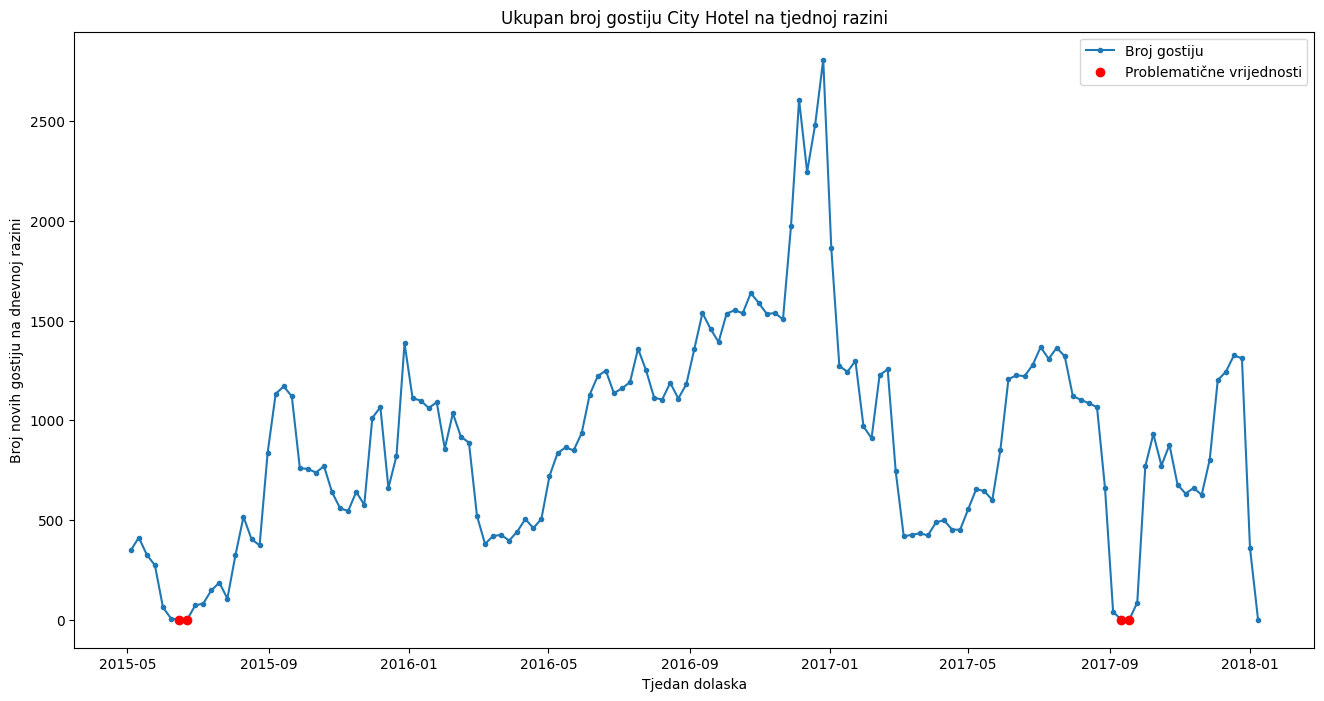

In [88]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')
plt.plot(NumberOfGuestsWeeklyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Ukupan broj gostiju City Hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj novih gostiju na dnevnoj razini')

plt.legend()
plt.show()

2015-02-09 00:00:00 2015-04-20 00:00:00
2015-06-15 00:00:00 2015-06-22 00:00:00
2017-09-11 00:00:00 2017-09-18 00:00:00


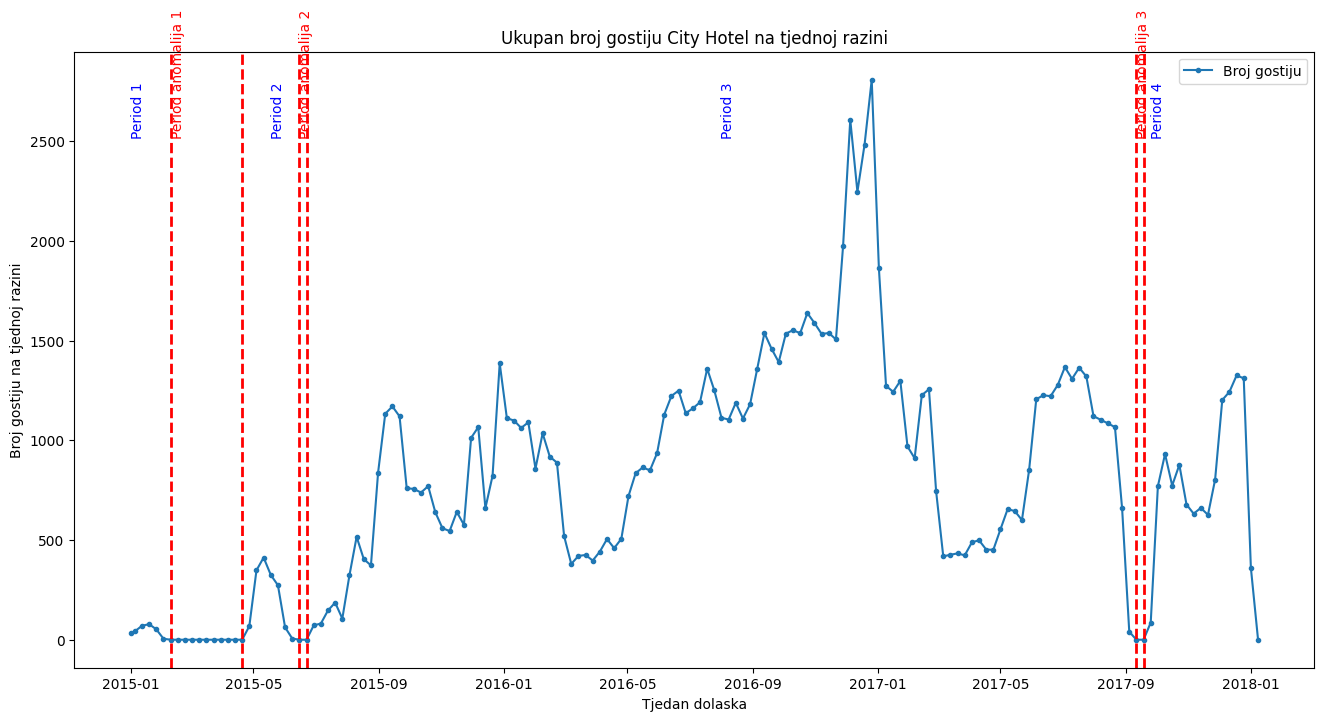

In [73]:
indexes = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]

for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i - 1]).days > 7:  
        end_date = indexes[i - 1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

plt.figure(figsize=(16, 8))
plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')

anomalous_period_count = 1
normal_period_count = 1

if periods[0][0] != NumberOfGuestsWeeklyCity.index.min():
    first_normal_end = periods[0][0] - pd.Timedelta(weeks=1)
    plt.text(NumberOfGuestsWeeklyCity.index.min(), max(NumberOfGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
    normal_period_count += 1

for i, (start, end) in enumerate(periods):
    print(start,end)
    plt.axvline(x=start, color='red', linestyle='--', lw=2)
    plt.axvline(x=end, color='red', linestyle='--', lw=2)
    plt.text(start, max(NumberOfGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period anomalija {anomalous_period_count}', color='red', rotation=90)
    anomalous_period_count += 1

    if i < len(periods) - 1:
        next_start = periods[i + 1][0]
        midpoint = pd.to_datetime((end.value + next_start.value) // 2)
        plt.text(midpoint, max(NumberOfGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
        normal_period_count += 1

if periods[-1][1] != NumberOfGuestsWeeklyCity.index.max():
    last_normal_start = periods[-1][1] + pd.Timedelta(weeks=1)
    plt.text(last_normal_start, max(NumberOfGuestsWeeklyCity['ukupno_gostiju']) * 0.9, f'Period {normal_period_count}', color='blue', rotation=90)
    normal_period_count += 1

plt.title('Ukupan broj gostiju City Hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')

plt.legend()
plt.show()

#### One Class SVM na podacima za detekciju anomalija

##### Tjedna razina

In [74]:
weekly_city_data = NumberOfNewGuestsWeeklyCity['ukupno_gostiju'].values.reshape(-1,1)
weekly_city_data_stand = scaler.fit_transform(weekly_city_data)

In [75]:
outliers_fraction = float(0.05)

In [76]:
osvm_city = OneClassSVM(nu = outliers_fraction, 
                   kernel = 'rbf', 
                   gamma = 0.01)
osvm_city.fit(weekly_city_data_stand)



OneClassSVM(gamma=0.01, nu=0.05)

In [77]:
NumberOfNewGuestsWeeklyCity['anomaly_value_osvm'] = osvm_city.predict(weekly_city_data_stand)

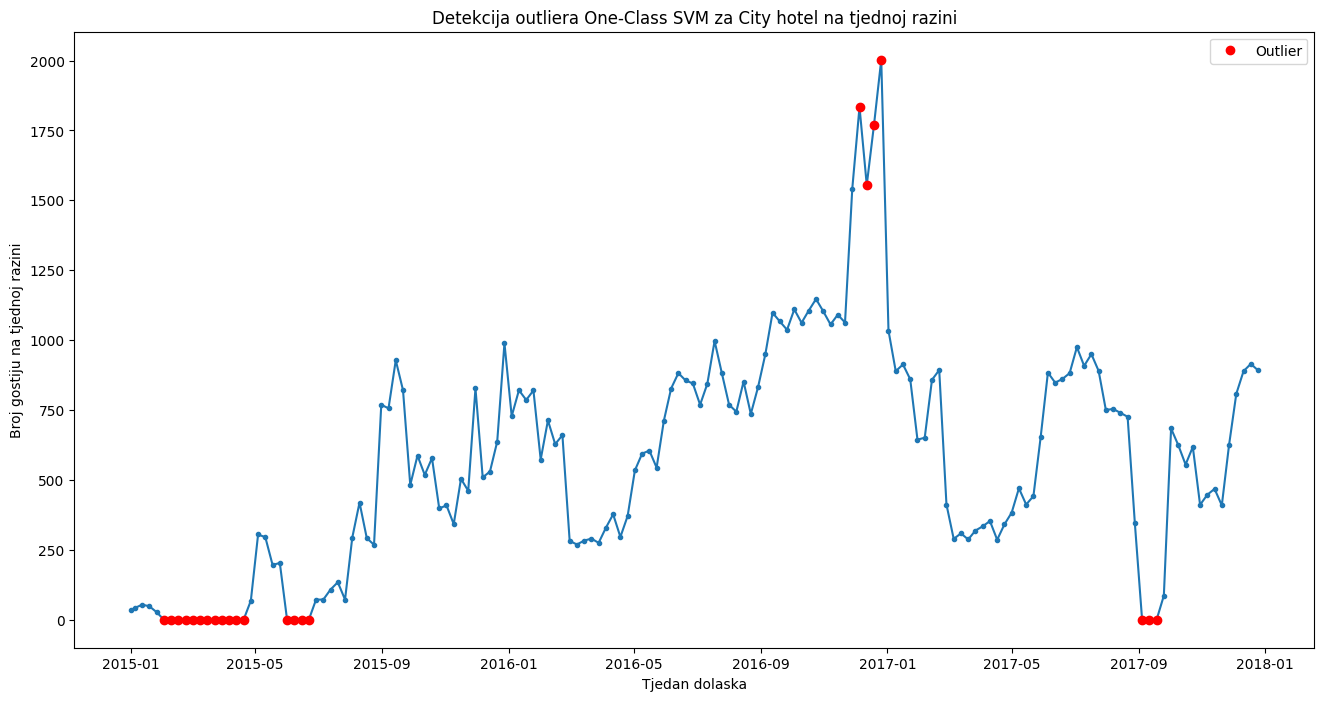

In [78]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfNewGuestsWeeklyCity['ukupno_gostiju'], marker='.')

anomalies_osvm = NumberOfNewGuestsWeeklyCity[NumberOfNewGuestsWeeklyCity['anomaly_value_osvm'] == -1]
plt.plot(anomalies_osvm['ukupno_gostiju'], 'o', color='red', label='Outlier')

plt.title('Detekcija outliera One-Class SVM za City hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')
plt.legend()
plt.show()


#### Brisanje, umetanje podataka i vizualizacija

1.KORAK - brisanje podataka sve do kraja prvog područja anomalija - do 30-04-2015

In [84]:
cutoff_date = pd.to_datetime('2015-04-27')
NumberOfGuestsWeeklyCity = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity.index > cutoff_date]


In [85]:
NumberOfGuestsWeeklyCity.head(5)

,ukupno_gostiju,prosjecna_cijena_po_osobi,anomaly_value_osvm
2015-05-04,348,47.779866,1
2015-05-11,412,45.523519,1
2015-05-18,325,51.015704,1
2015-05-25,273,47.421565,1
2015-06-01,62,44.962570,1


Periodi gdje je broj gostiju jednak nuli: od 2015-06-15 do 2015-06-22, ukupno 2 tjedna
Periodi gdje je broj gostiju jednak nuli: od 2017-09-11 do 2017-09-18, ukupno 2 tjedna


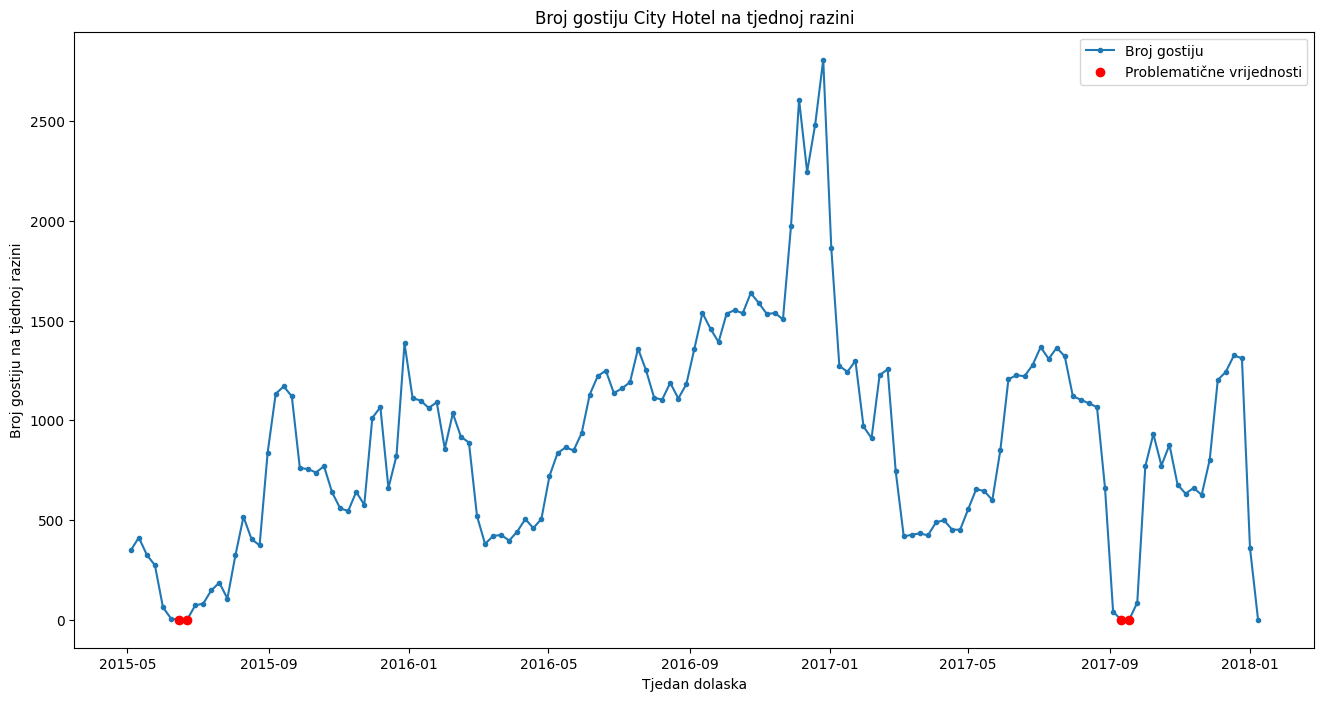

In [128]:
indexes = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['ukupno_gostiju'] == 0].index
periods = []
start_date = indexes[0]

for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days > 7:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli: od {start.date()} do {end.date()}, ukupno {(end - start).days // 7 + 1} tjedna")
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')


plt.plot(NumberOfGuestsWeeklyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Broj gostiju City Hotel na tjednoj razini')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')

plt.legend()
plt.show()


KOMENTAR: Ove raspone dana dobili smo uvidom u indekse anomalija za broj novih gostiju na dnevnoj razini

In [118]:
NumberOfGuestsWeeklyCity[120:129]

,ukupno_gostiju,prosjecna_cijena_po_osobi,anomaly_value_osvm
2017-08-21,1066,54.038677,1
2017-08-28,658,56.921302,1
2017-09-04,40,53.122300,1
2017-09-11,0,0.000000,-1
2017-09-18,0,0.000000,-1
2017-09-25,86,71.046846,1
2017-10-02,770,78.151848,1
2017-10-09,931,78.883584,1
2017-10-16,773,78.272198,1


In [125]:
local_anomalies = pd.to_datetime(['2015-06-01', '2015-06-08', '2017-08-28', '2017-09-04', '2017-09-25'])

In [129]:
indexes =indexes.union(local_anomalies)

Periodi gdje je broj gostiju jednak nuli: od 2015-06-01 do 2015-06-22, ukupno 4 tjedna
Periodi gdje je broj gostiju jednak nuli: od 2017-08-28 do 2017-09-25, ukupno 5 tjedna


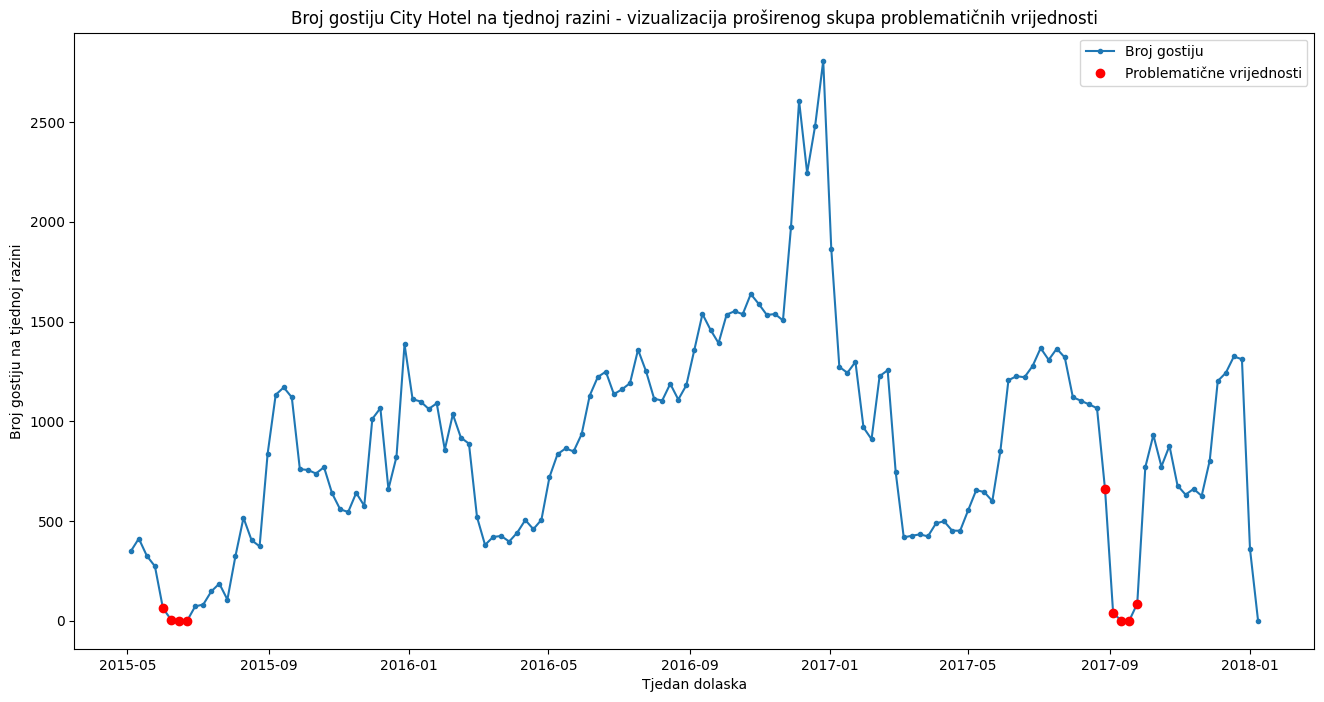

In [131]:
periods = []
start_date = indexes[0]

for i in range(1, len(indexes)):
    if (indexes[i] - indexes[i-1]).days > 7:
        end_date = indexes[i-1]
        periods.append((start_date, end_date))
        start_date = indexes[i]

periods.append((start_date, indexes[-1]))

for start, end in periods:
    print(f"Periodi gdje je broj gostiju jednak nuli: od {start.date()} do {end.date()}, ukupno {(end - start).days // 7 + 1} tjedna")
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju')


plt.plot(NumberOfGuestsWeeklyCity.loc[indexes, 'ukupno_gostiju'], 'o', color='red', label='Problematične vrijednosti')

plt.title('Broj gostiju City Hotel na tjednoj razini - vizualizacija proširenog skupa problematičnih vrijednosti')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj gostiju na tjednoj razini')

plt.legend()
plt.show()


2.KORAK -umetanje podataka

In [132]:
indexes_valid = NumberOfGuestsWeeklyCity[NumberOfGuestsWeeklyCity['ukupno_gostiju'] != 0].index
periods_valid = []
start_date = indexes_valid[0]

for i in range(1, len(indexes_valid)):
    if (indexes_valid[i] - indexes_valid[i-1]).days > 7:
        end_date = indexes_valid[i-1]
        periods_valid.append((start_date, end_date))
        start_date = indexes_valid[i]

periods_valid.append((start_date, indexes_valid[-1]))

for start, end in periods_valid:
    total_weeks = (end - start).days // 7 + 1
    print(f"Periodi gdje je broj gostiju različit nuli: od {start.date()} do {end.date()}, ukupno {total_weeks} tjedna")


Periodi gdje je broj gostiju različit nuli: od 2015-05-04 do 2015-06-08, ukupno 6 tjedna
Periodi gdje je broj gostiju različit nuli: od 2015-06-29 do 2017-09-04, ukupno 115 tjedna
Periodi gdje je broj gostiju različit nuli: od 2017-09-25 do 2018-01-08, ukupno 16 tjedna


In [144]:
def calculate_mean_for_window_weekly(start, end):
    #window_data = NumberOfGuestsWeeklyCity[(NumberOfGuestsWeeklyCity.index >= start) & (NumberOfGuestsDailyCity.index <= end)]
    window_data = NumberOfGuestsWeeklyCity[(NumberOfGuestsWeeklyCity.index >= start) & (NumberOfGuestsWeeklyCity.index <= end)]

    return window_data['ukupno_gostiju'].mean(),window_data['prosjecna_cijena_po_osobi'].mean()

In [147]:
for start, end in periods:
    period_length_weeks = (end - start).days // 7

    if period_length_weeks == 1:
        window_start_before = start - pd.Timedelta(weeks=1)
        window_end_after = end + pd.Timedelta(weeks=1)
    elif period_length_weeks < 3:
        window_start_before = start - pd.Timedelta(weeks=2) # Adjusted window size for weeks
        window_end_after = end + pd.Timedelta(weeks=2) # Adjusted window size for weeks
    else:
        window_start_before = start - pd.Timedelta(weeks=1) # Adjusted window size for weeks
        window_end_after = end + pd.Timedelta(weeks=1) # Adjusted window size for weeks

    window_start_before = max(window_start_before, NumberOfGuestsWeeklyCity.index.min())
    window_end_after = min(window_end_after, NumberOfGuestsWeeklyCity.index.max())

    mean_before, mean_price_before = calculate_mean_for_window(window_start_before, start - pd.Timedelta(weeks=1))
    mean_after, mean_price_after = calculate_mean_for_window(end + pd.Timedelta(weeks=1), window_end_after)

    mean_value = (mean_before + mean_after) / 2
    mean_price = (mean_price_before + mean_price_after) / 2
 
    for week_start in pd.date_range(start, end, freq='W'):
        if week_start in NumberOfGuestsWeeklyCity.index:
            variance_percentage = random.uniform(-0.2, 0.2) if mean_value < 300 else random.uniform(-0.1, 0.1)
            varied_mean_value = mean_value + (mean_value * variance_percentage)

            mean_price = mean_price + (mean_price * random.uniform(-0.05, 0.05))
            NumberOfGuestsWeeklyCity.at[week_start, 'ukupno_gostiju'] = varied_mean_value
            NumberOfGuestsWeeklyCity.at[week_start, 'prosjecna_cijena_po_osobi'] = mean_price



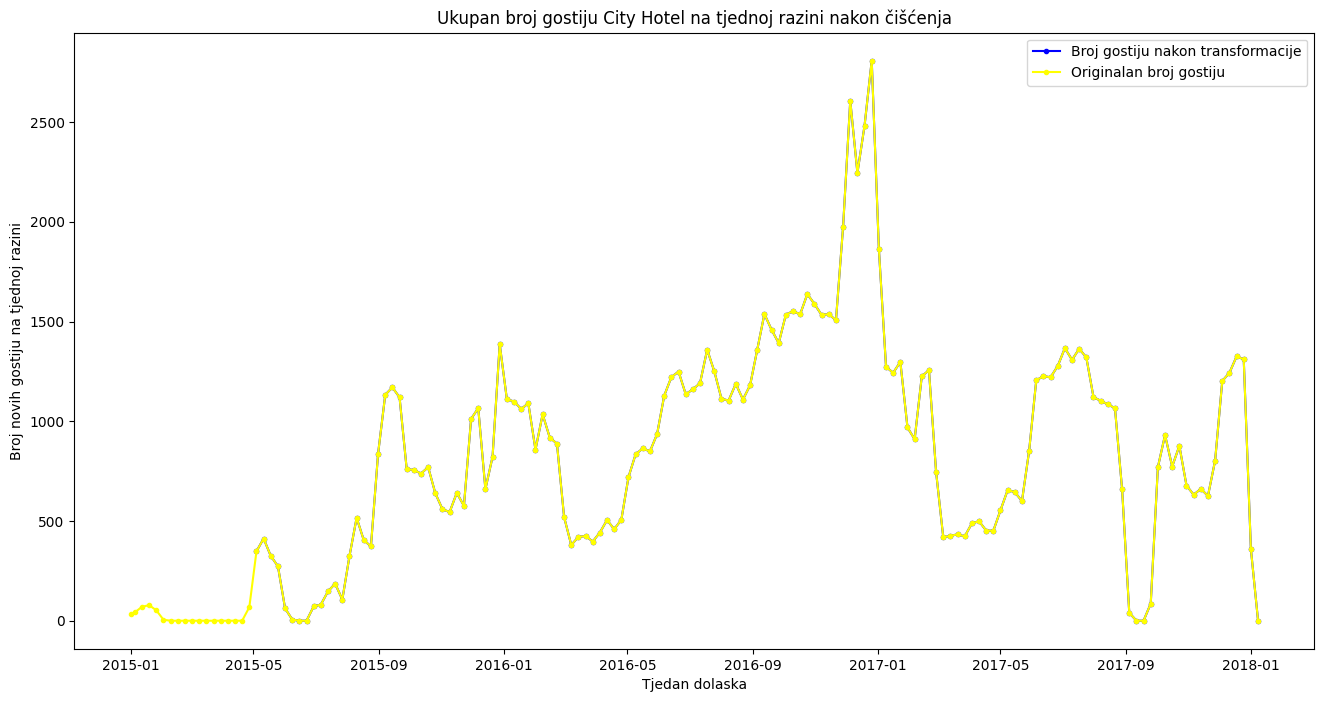

In [148]:
plt.figure(figsize=(16, 8))

plt.plot(NumberOfGuestsWeeklyCity['ukupno_gostiju'], marker='.', label='Broj gostiju nakon transformacije', color='blue')
plt.plot(NumberOfGuestsWeeklyCityCopy['ukupno_gostiju'], marker='.', label='Originalan broj gostiju', color='yellow')

plt.title('Ukupan broj gostiju City Hotel na tjednoj razini nakon čišćenja')
plt.xlabel('Tjedan dolaska')
plt.ylabel('Broj novih gostiju na tjednoj razini')

plt.legend()
plt.show()


### Mjesečna razina